# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
!pip install kaggle
!kaggle competitions download -c nyc-taxi-trip-duration

Defaulting to user installation because normal site-packages is not writeable
nyc-taxi-trip-duration.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#!unzip nyc-taxi-trip-duration.zip
#!unzip train.zip

In [6]:
df = pd.read_csv('train.csv')
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [7]:
df.drop(columns='dropoff_datetime', inplace=True)

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [9]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

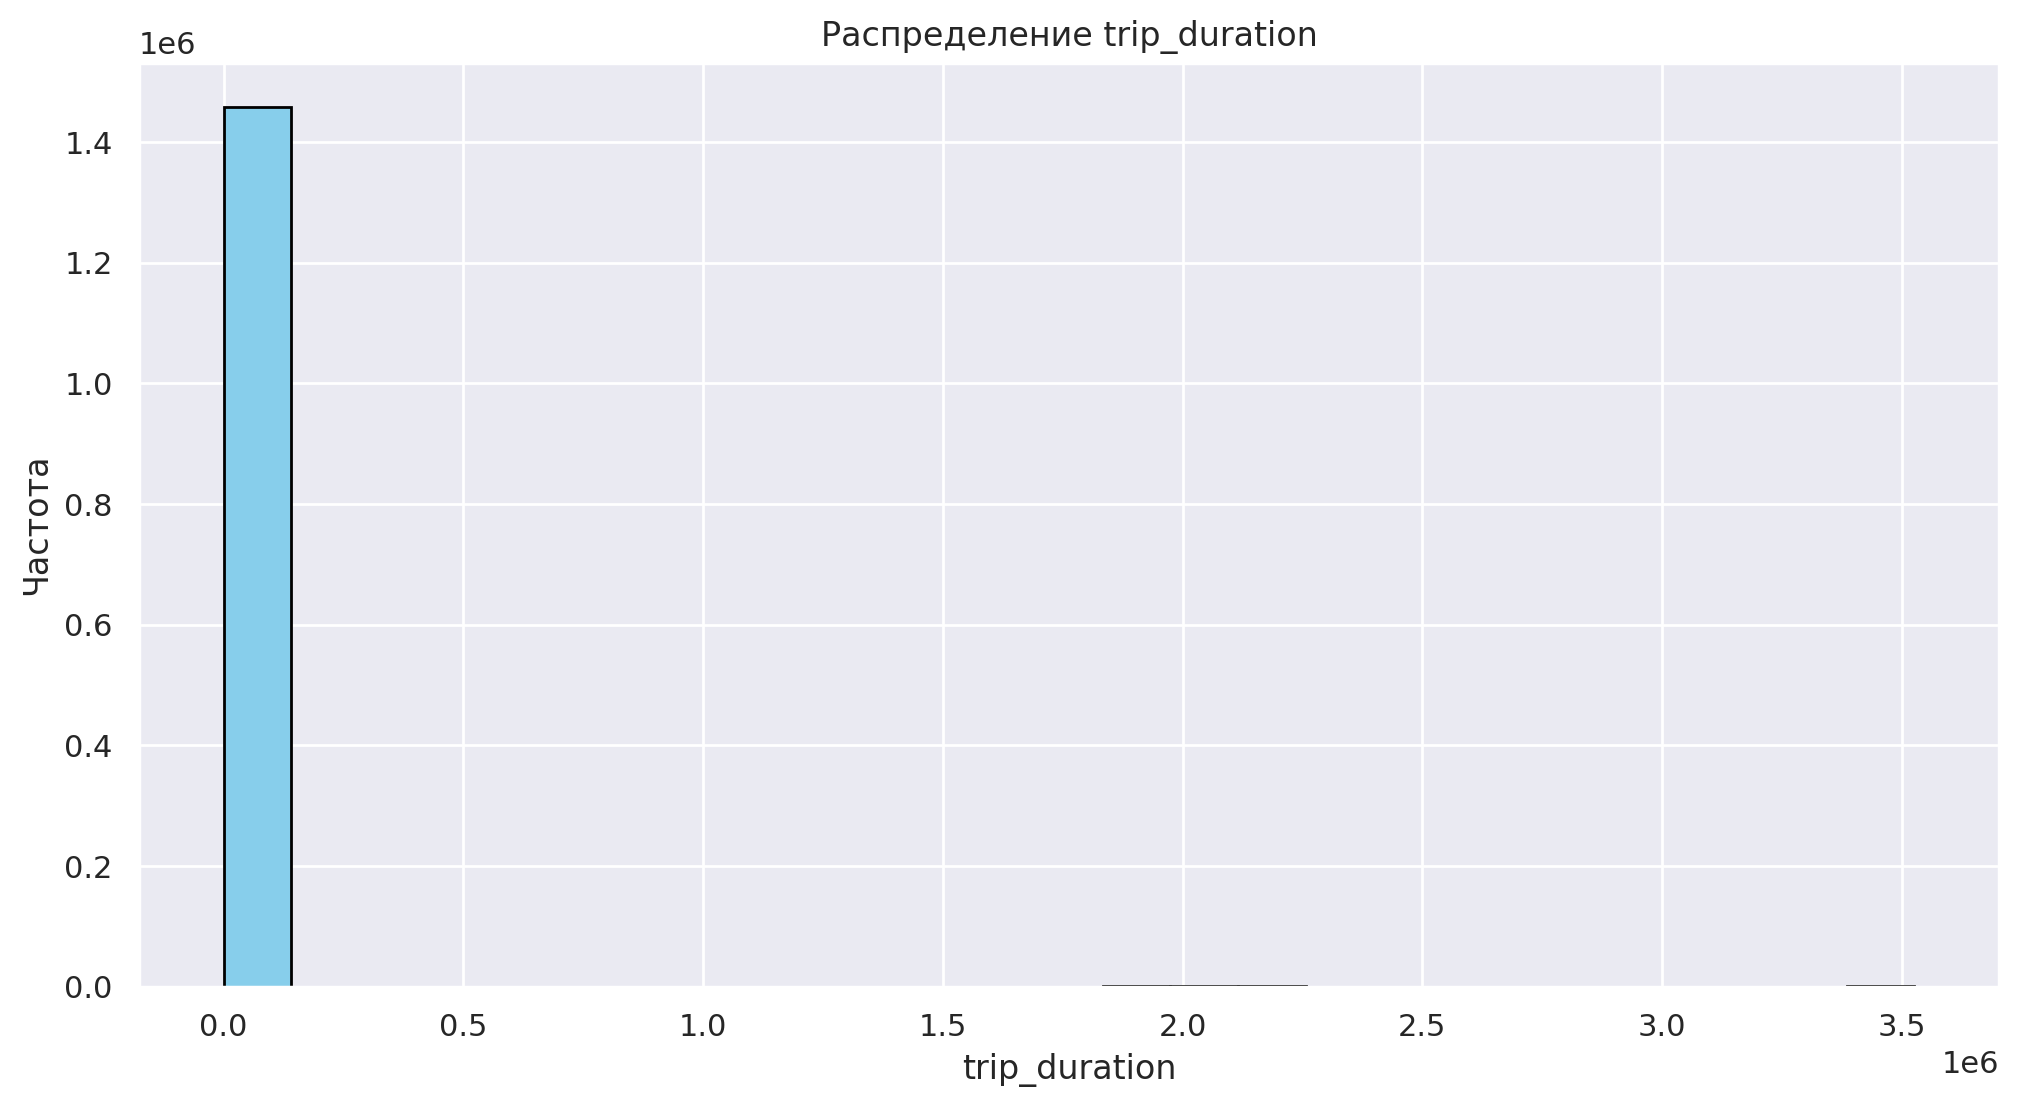

In [11]:
plt.hist(df['trip_duration'], bins=25, color='skyblue', edgecolor='black')
plt.title('Распределение trip_duration')
plt.xlabel('trip_duration')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Особенности**

- Большое количество коротких поездок (высокая концентрация около 0)

- Небольшое количество очень длинных поездок

- Имеются небольшие выбросы

Кажется чтобы график был более наглядным величину необходимо логарифмировать.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Я думаю основной причиной является снижения влияния влияния выбросов, также мы сделаем выборку более равномерной.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Оптимизация эквивалента, т.к. мы вводим в нашу функцию логарифм и квадратный корень, которые являются монотонными функциями, а оптимизации по монотонным функциям эквивалентны.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

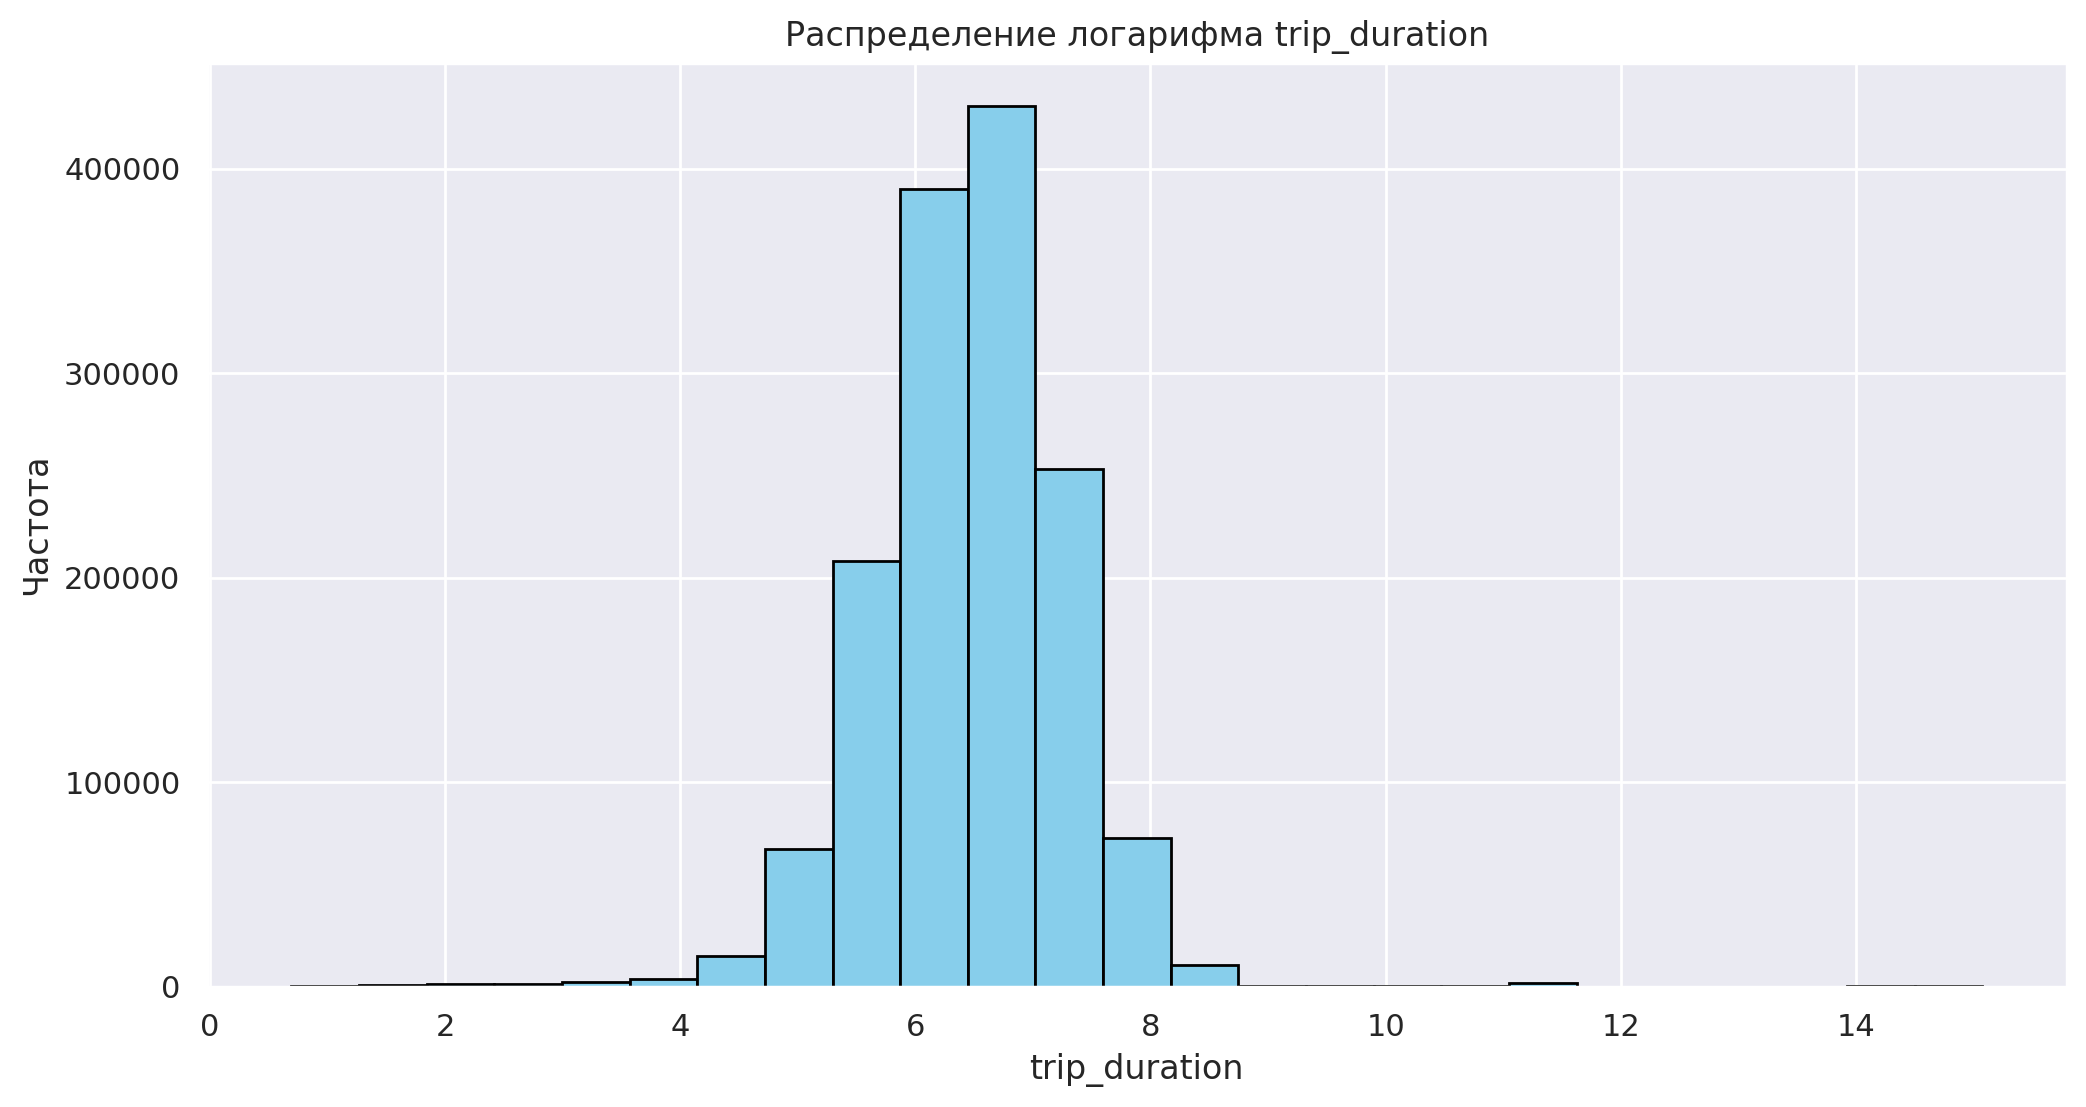

In [12]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
#df.drop(columns='trip_duration', inplace=True) Она пригодится ещё

plt.hist(df['log_trip_duration'], bins=25, color='skyblue', edgecolor='black')
plt.title('Распределение логарифма trip_duration')
plt.xlabel('trip_duration')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [13]:
def rmsle(log1p_y_true, log1p_y_pred):
    res = (log1p_y_true - log1p_y_pred) ** 2
    res = np.mean(res)
    res = np.sqrt(res)
    return res


rmsle_best_const = rmsle(df['log_trip_duration'], np.mean(df['log_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

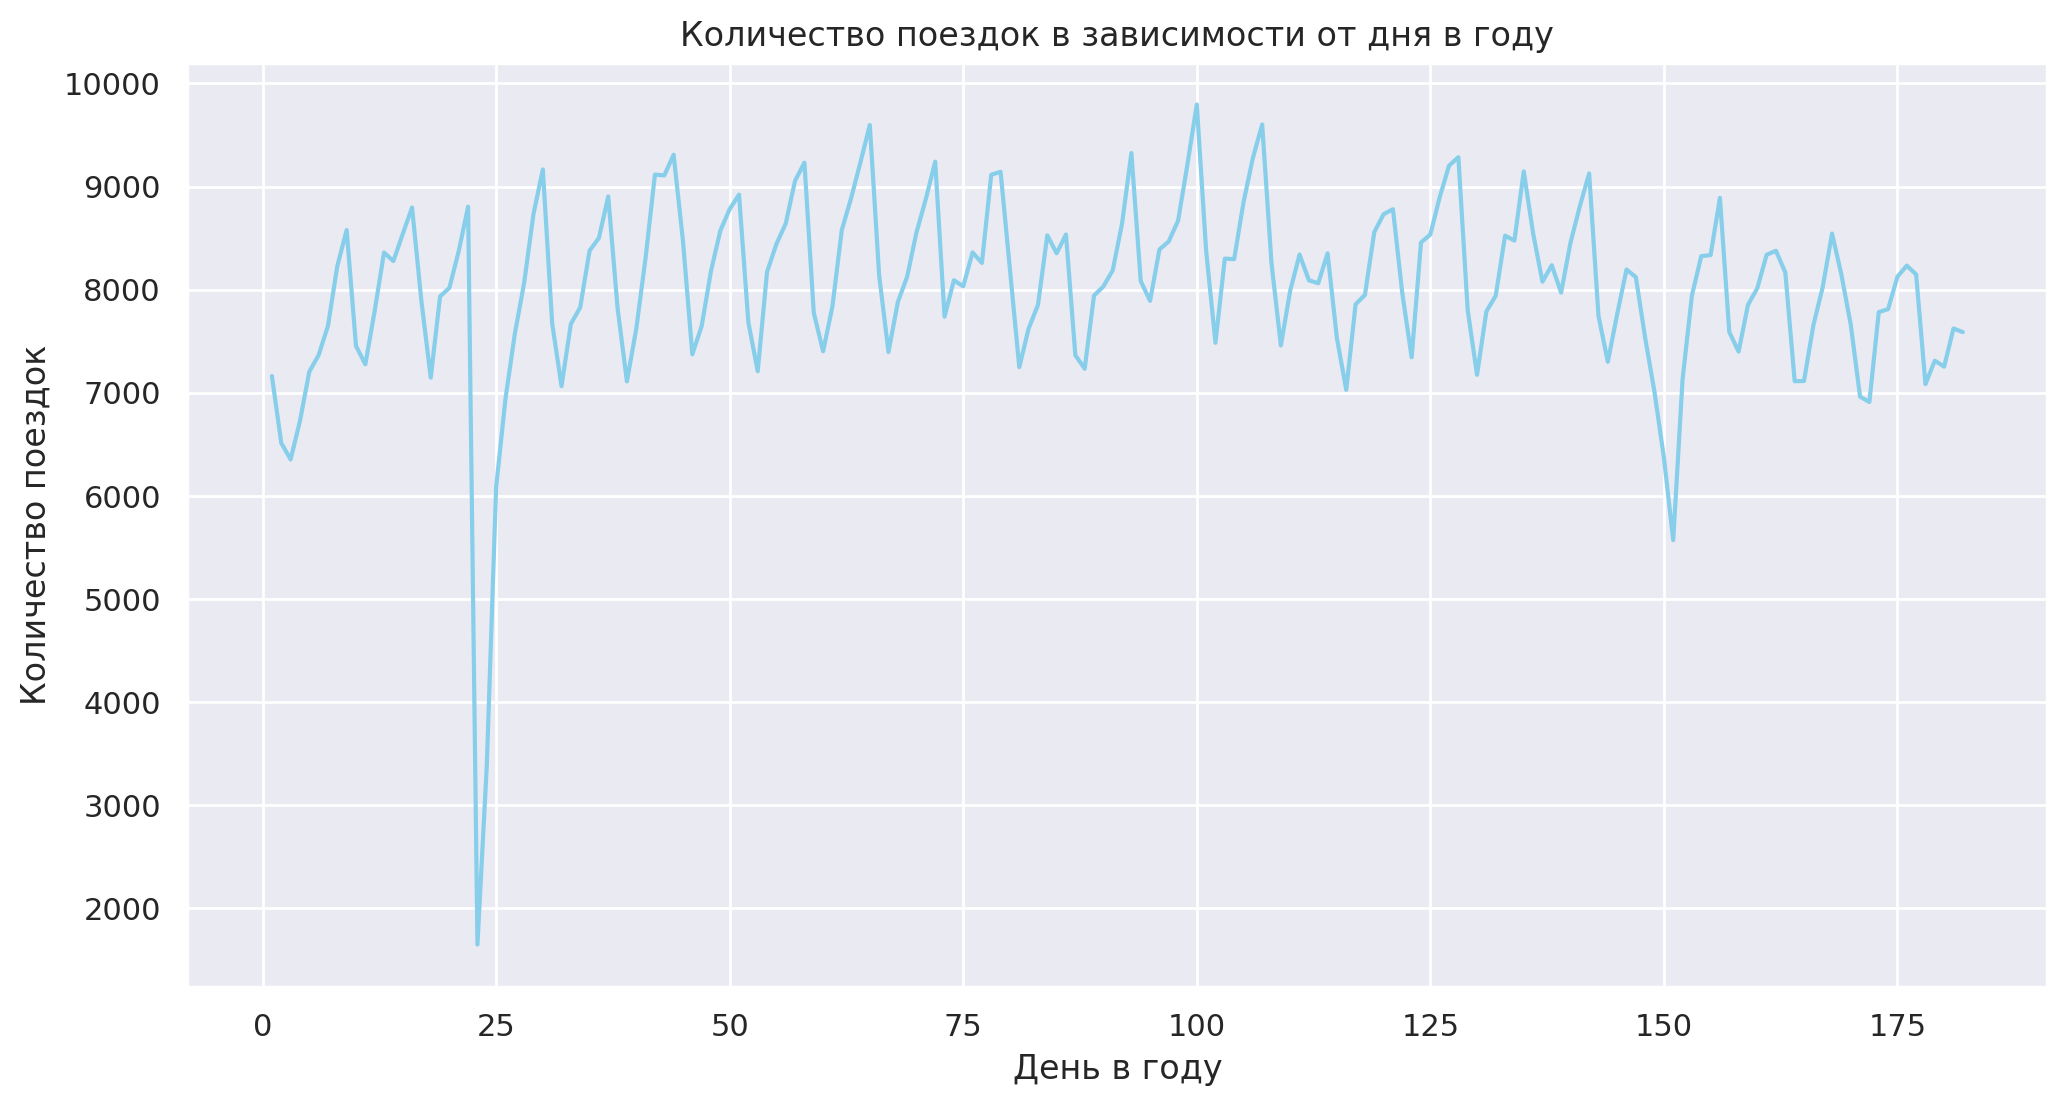

In [14]:
daily_trip_counts = df.groupby(df['pickup_datetime'].dt.dayofyear)[['id']].count().reset_index()
daily_trip_counts.rename(columns={'id': 'count'}, inplace=True)
sns.lineplot(data=daily_trip_counts, y='count', x='pickup_datetime', color='skyblue')
plt.title('Количество поездок в зависимости от дня в году')
plt.xlabel('День в году')
plt.ylabel('Количество поездок')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.


In [15]:
daily_trip_counts = df.groupby(df['pickup_datetime'].dt.dayofyear)[['id']].count().reset_index()
daily_trip_counts.rename(columns={'id': 'count'}, inplace=True)

anomalous_days = daily_trip_counts[daily_trip_counts['count'] < (daily_trip_counts['count'].mean() - 3 * daily_trip_counts['count'].std())]
anomalous_days

pickup_datetime  count
22               23   1648
23               24   3383

In [16]:
import warnings
warnings.simplefilter("ignore")

anomalous_days['pickup_datetime'] = pd.to_datetime(anomalous_days['pickup_datetime'], unit='D', origin=pd.Timestamp('2016'))


In [17]:
anomalous_days

pickup_datetime  count
22      2016-01-24   1648
23      2016-01-25   3383

Согласно новостям в январе 16 года в 20-ых числах был [сильнейший снегопад за столетие](https://www.bbc.com/russian/international/2016/01/160124_snowstorm_us_sunday), что привело к низкому спросу на такси.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`)

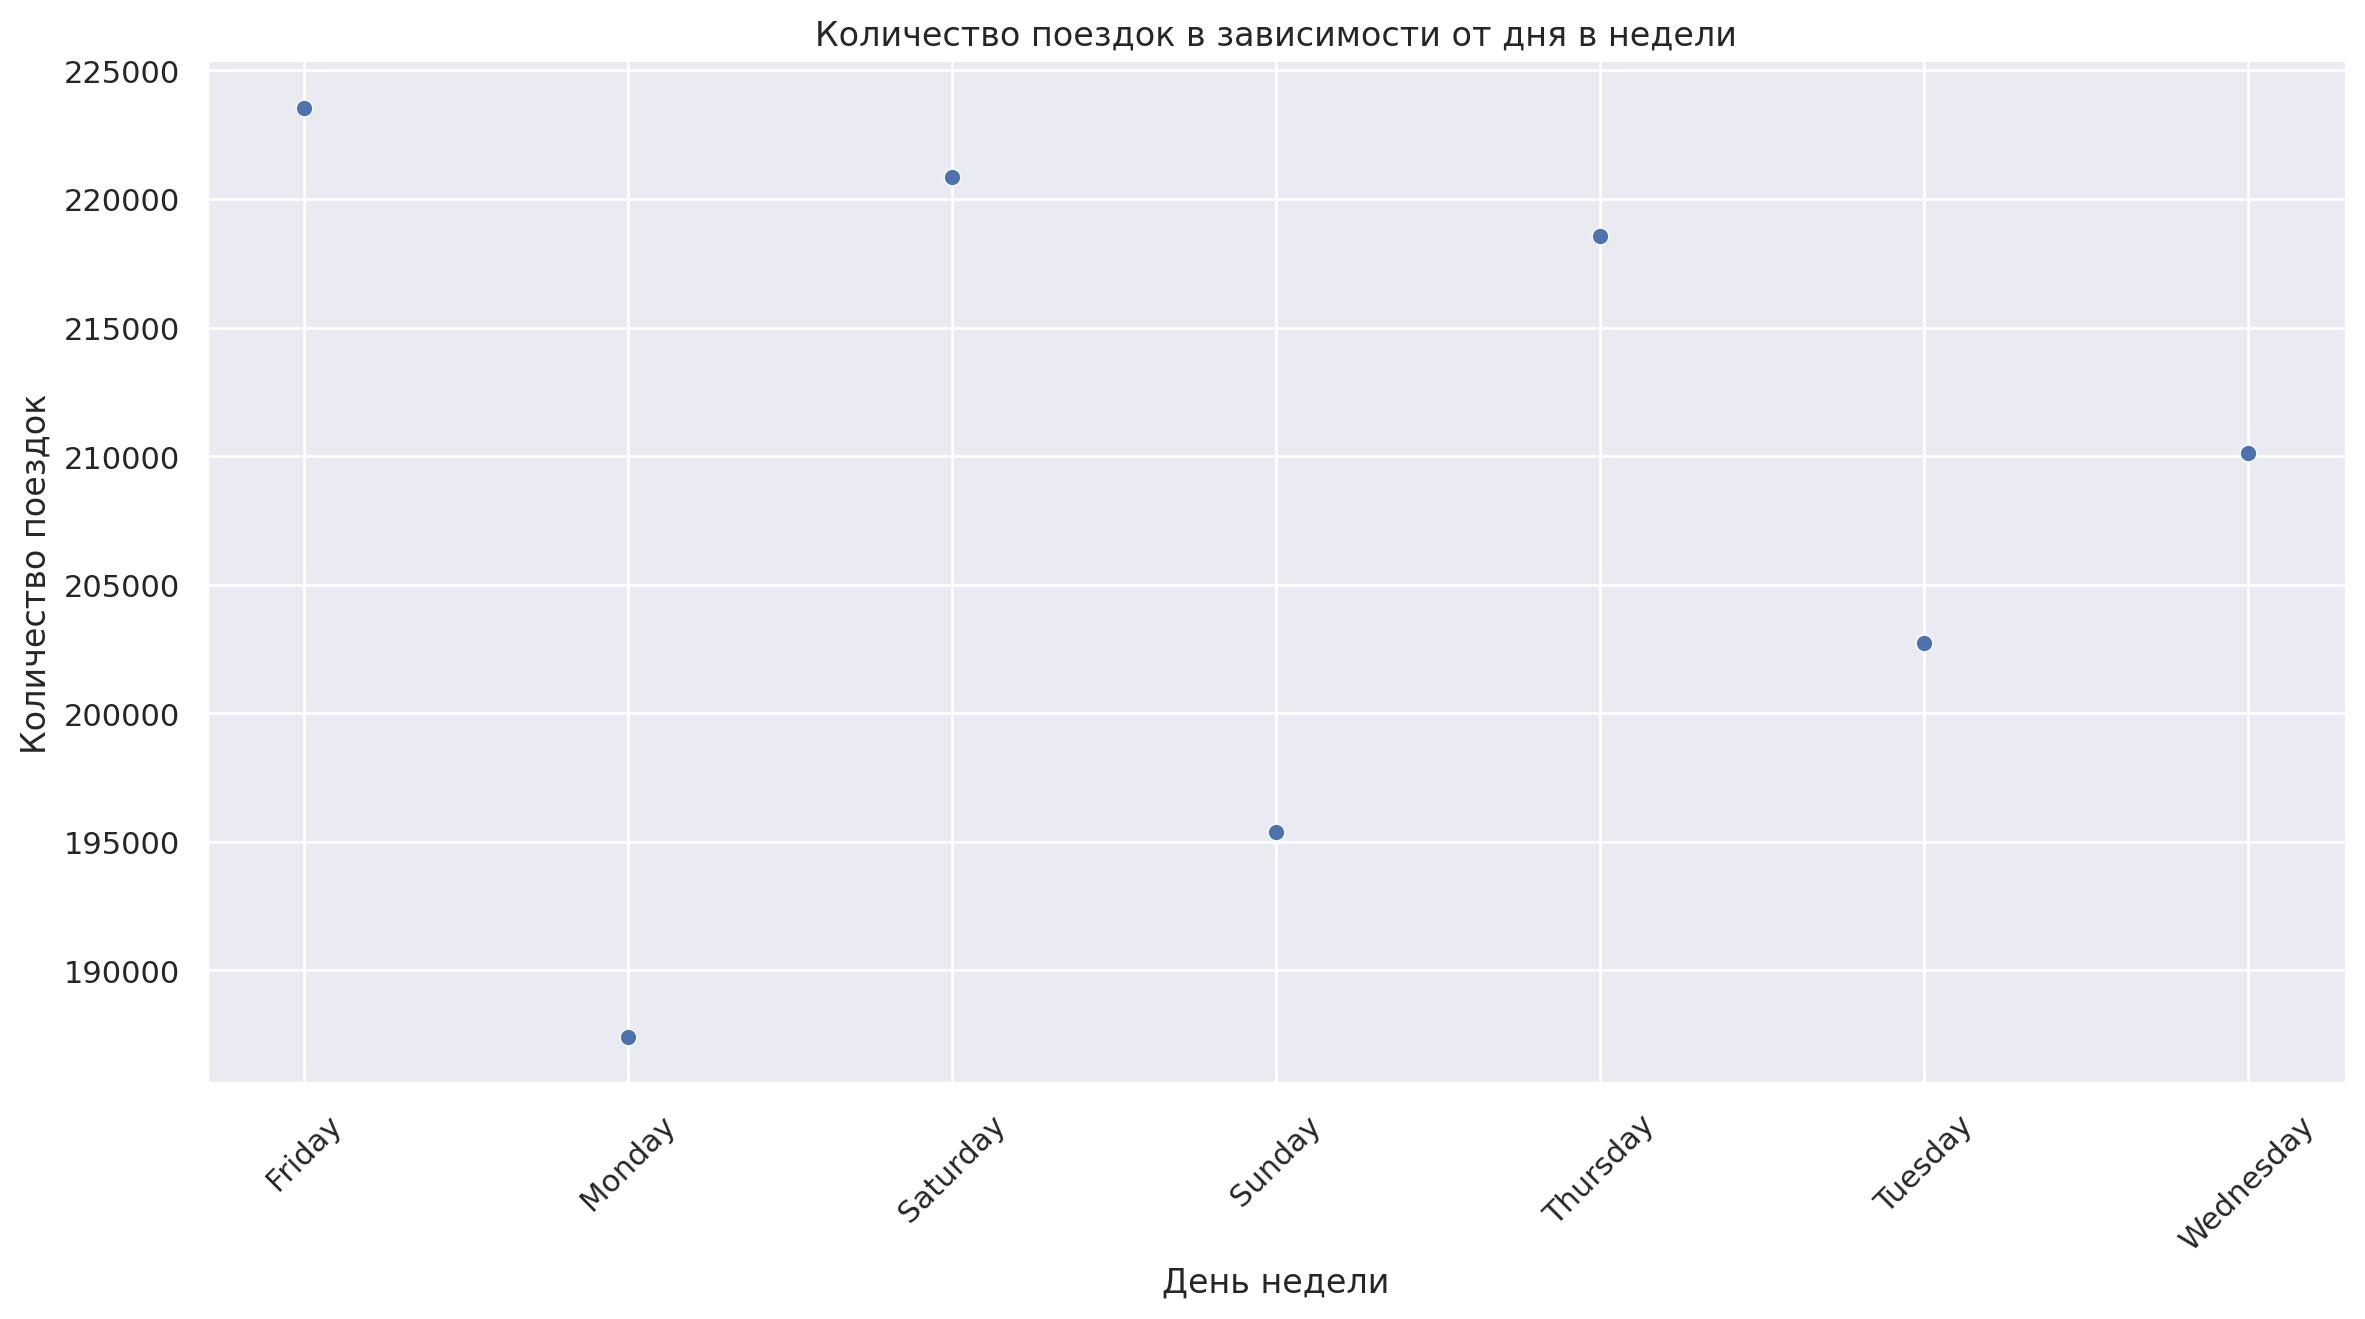

In [18]:
daily_trip_counts = df.groupby(df['pickup_datetime'].dt.day_name())[['id']].count().reset_index()
daily_trip_counts.rename(columns={'id': 'count'}, inplace=True)

sns.relplot(data=daily_trip_counts, y='count', x='pickup_datetime', height=6, aspect=2)
plt.title('Количество поездок в зависимости от дня в недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.show()

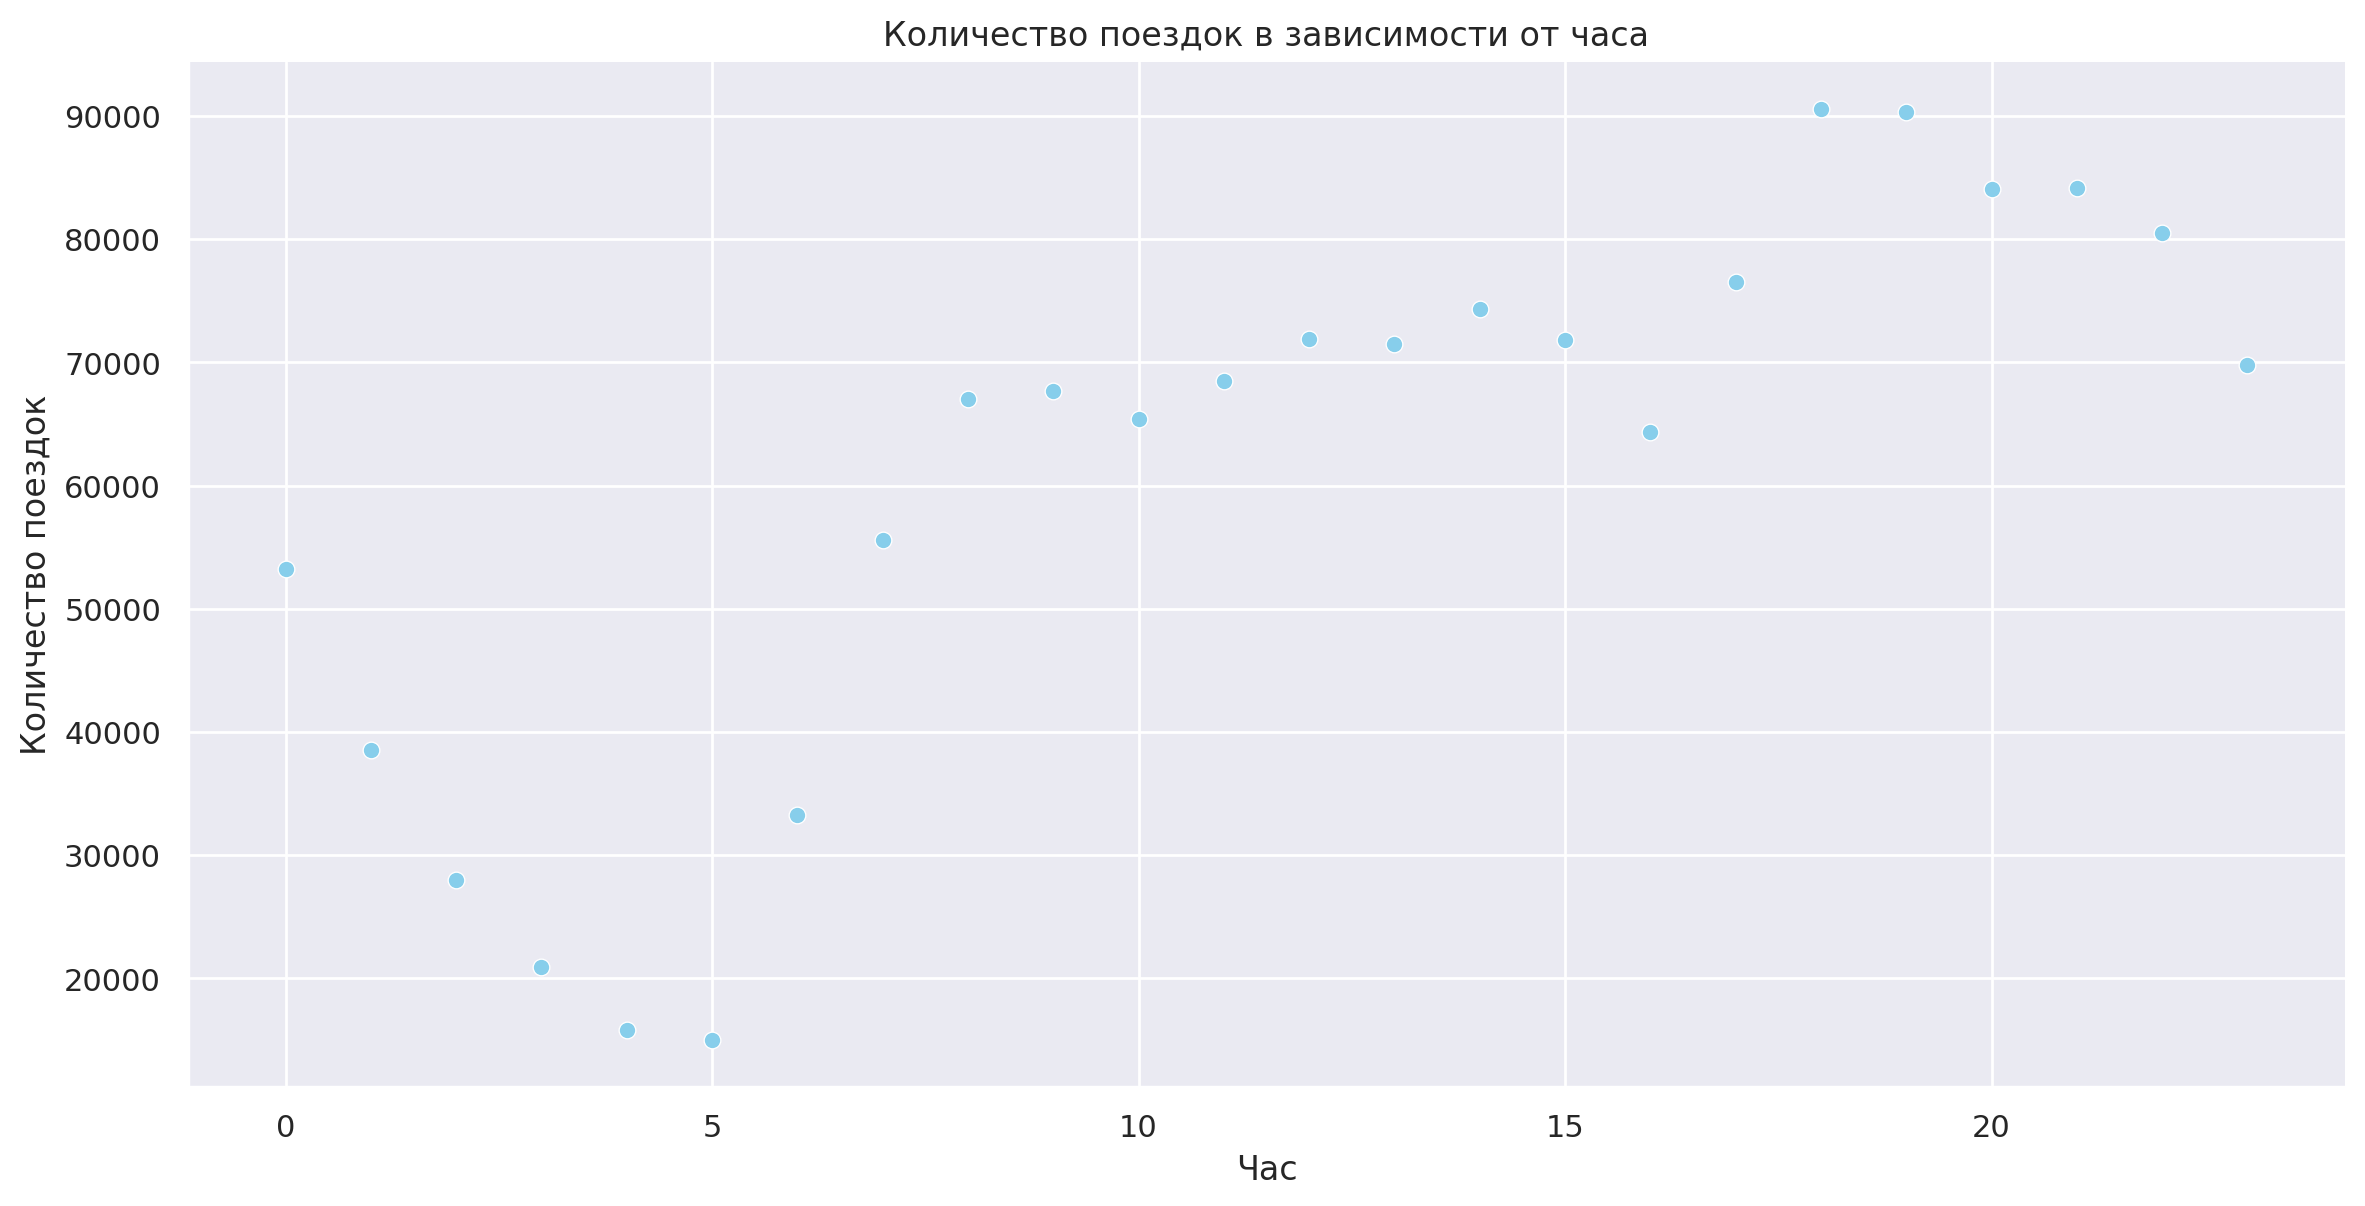

In [19]:
daily_trip_counts = df.groupby(df['pickup_datetime'].dt.hour)[['id']].count().reset_index()
daily_trip_counts.rename(columns={'id': 'count'}, inplace=True)

sns.relplot(data=daily_trip_counts, y='count', x='pickup_datetime', color='skyblue', height=6, aspect=2)
plt.title('Количество поездок в зависимости от часа')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

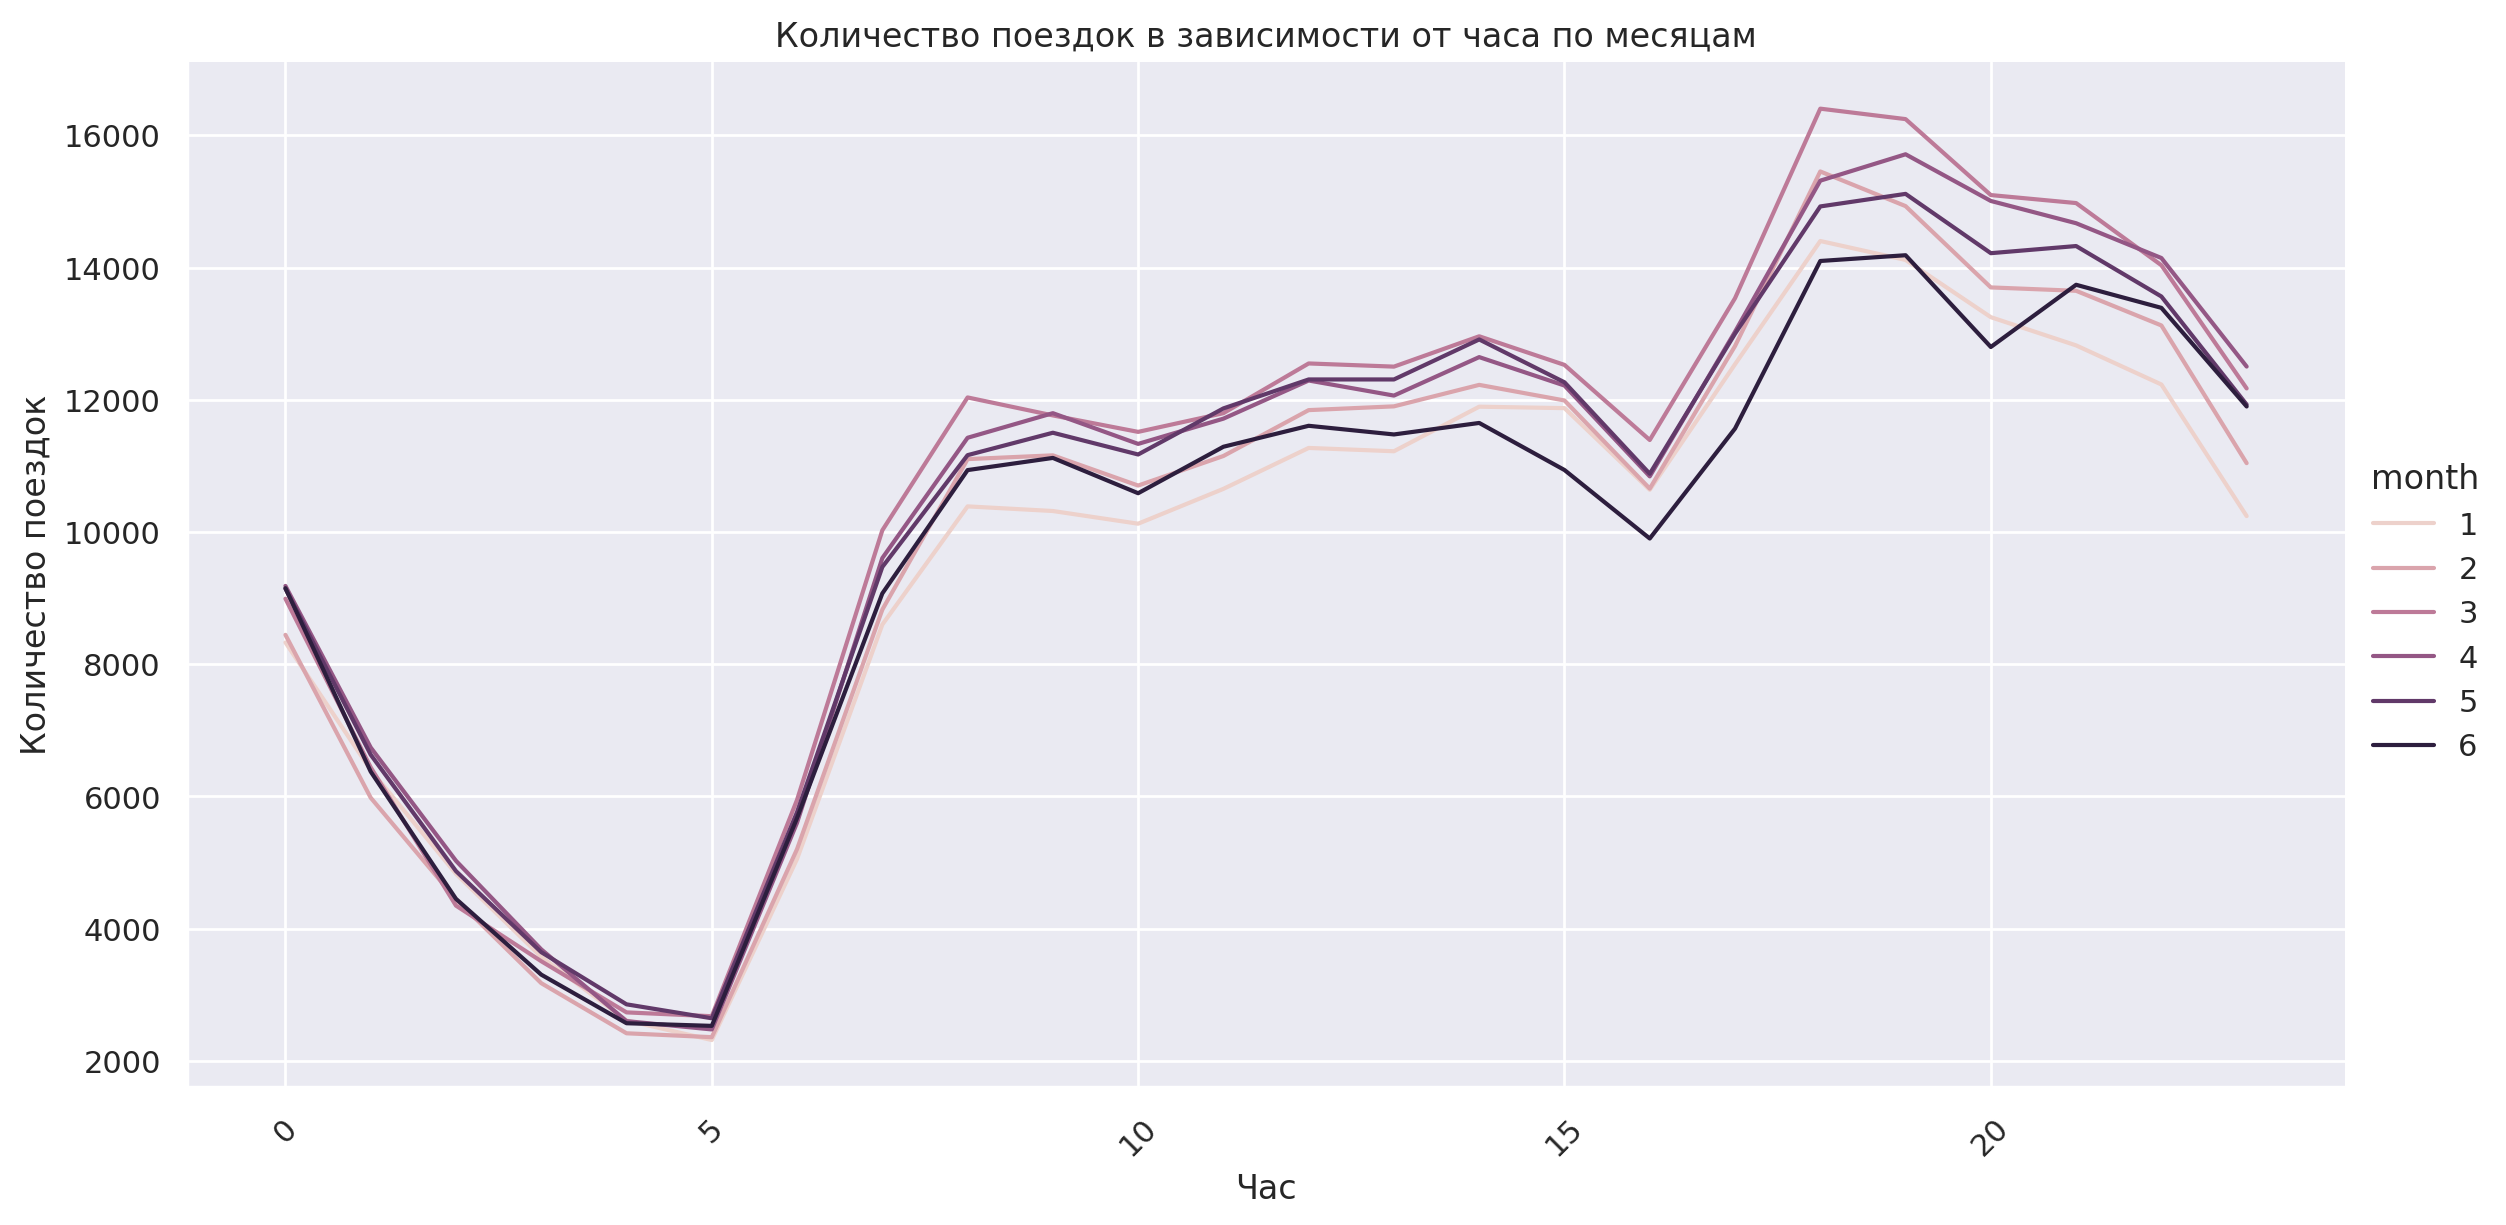

In [20]:
daily_trip_counts = df.copy()
daily_trip_counts['month'] = daily_trip_counts['pickup_datetime'].dt.month
daily_trip_counts = daily_trip_counts.groupby(by=['month',  daily_trip_counts['pickup_datetime'].dt.hour])[['id']].count().reset_index()
daily_trip_counts.rename(columns={'id': 'count'}, inplace=True)


sns.relplot(data=daily_trip_counts, y='count', x='pickup_datetime', color='skyblue', hue='month', kind='line', height=6, aspect=2)
plt.title('Количество поездок в зависимости от часа по месяцам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.show()

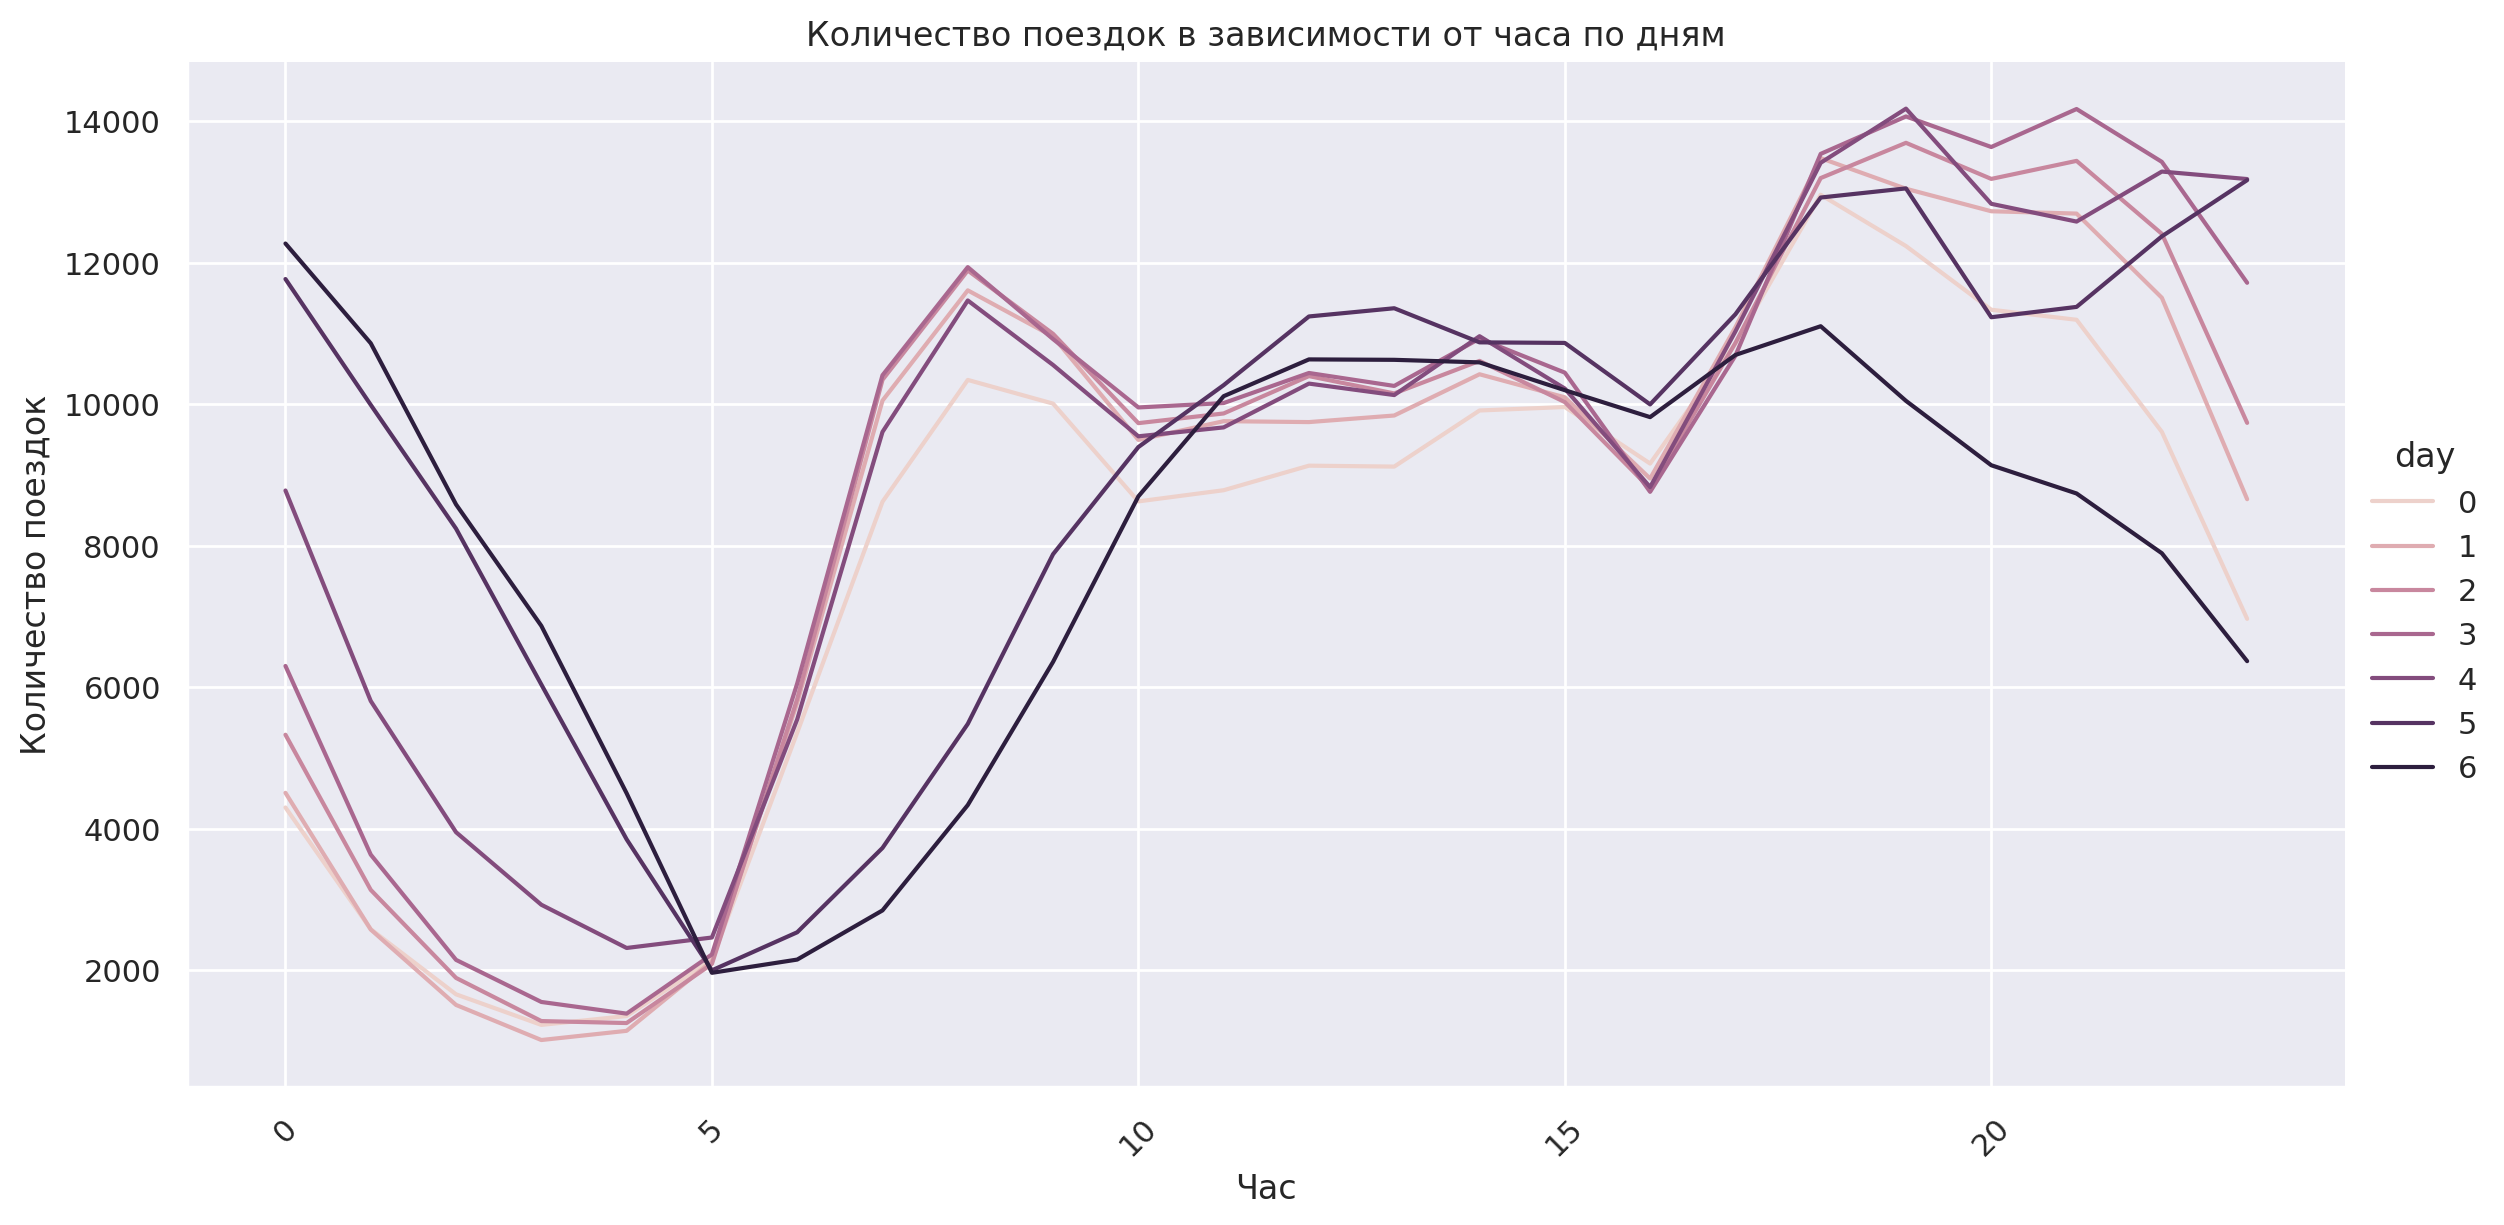

In [21]:
daily_trip_counts = df.copy()
daily_trip_counts['day'] = daily_trip_counts['pickup_datetime'].dt.dayofweek
daily_trip_counts = daily_trip_counts.groupby(by=['day',  daily_trip_counts['pickup_datetime'].dt.hour])[['id']].count().reset_index()
daily_trip_counts.rename(columns={'id': 'count'}, inplace=True)

sns.relplot(data=daily_trip_counts, y='count', x='pickup_datetime', color='skyblue', hue='day', kind='line', height=6, aspect=2)
plt.title('Количество поездок в зависимости от часа по дням')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Основываясь на графиках можно сделать вывод, что количество поездок имеет зависимость от месяца и дня недели, а также времени поездки.

- Так видно, что в марте почти в любое время суток наблюдается максимальное количество поездок по сравнению с другими месяцами.

- Если смотреть на дни недели, то их можно визуально разделить на две группы: понедельник-пятница и суббота-воскресенье. Дни в одной группе ведут себя примерно одинаково.

Такие зависимости могут иметь разные причины, если говорить о днях недели, то тут очевидно бросается в глаза то, что первая группа это будни, а вторая выходные дни.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [22]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.3, random_state=42)

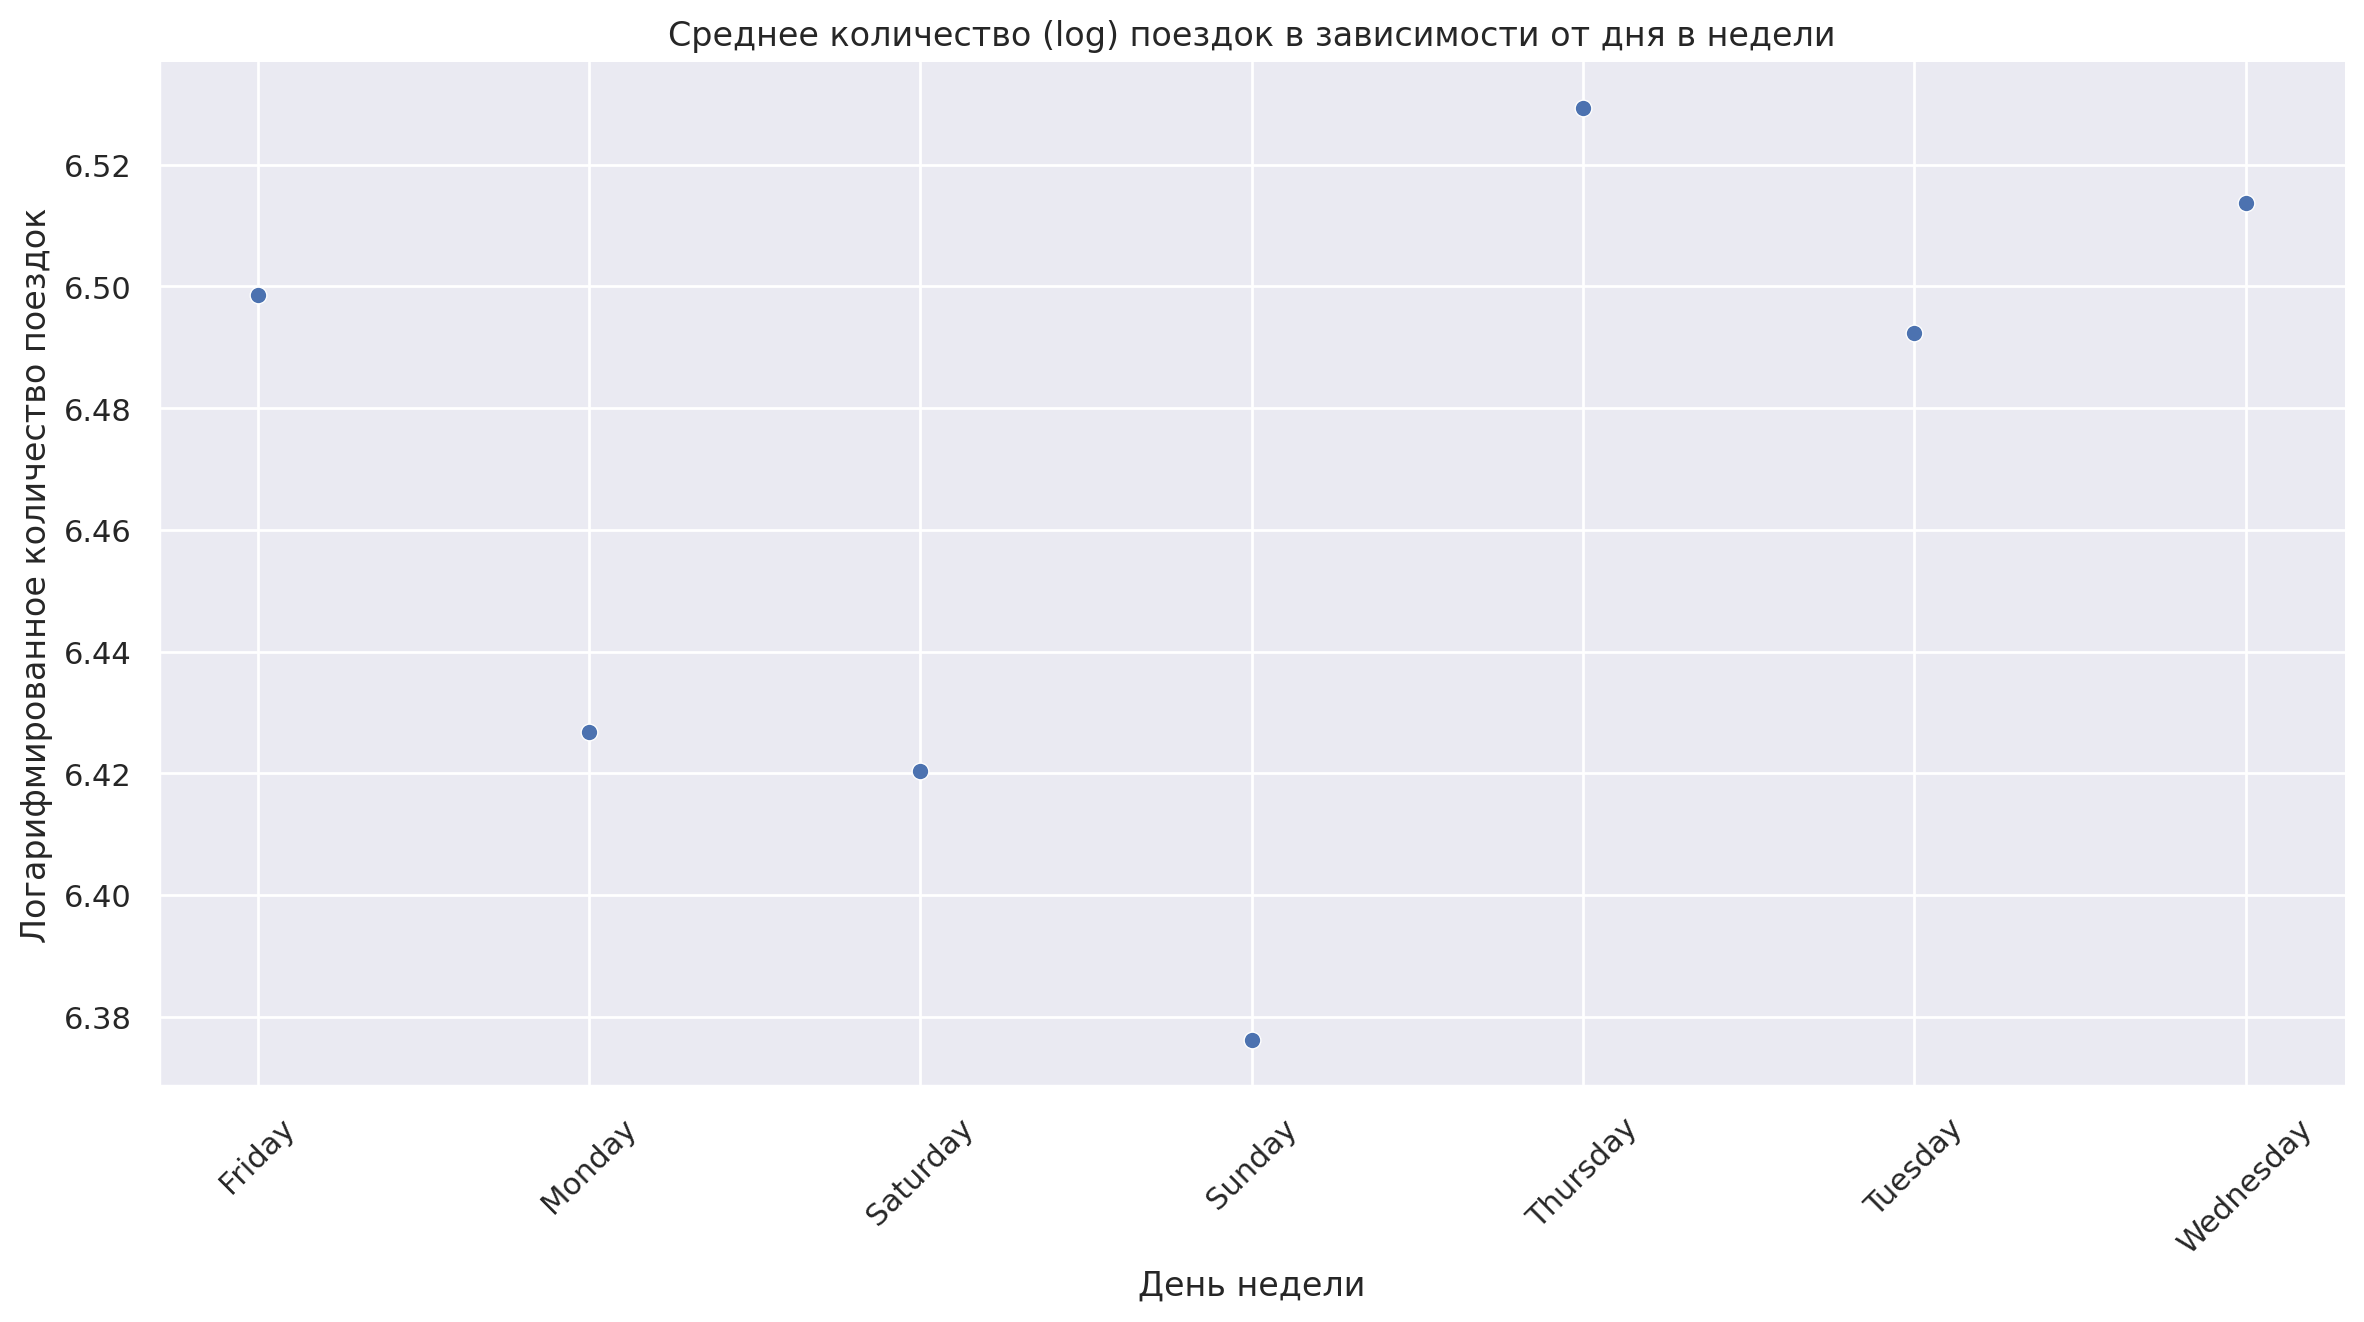

In [24]:
week = X_train.groupby(X_train['pickup_datetime'].dt.day_name())['log_trip_duration'].mean().reset_index()
sns.relplot(data=week, y='log_trip_duration', x='pickup_datetime', height=6, aspect=2)
plt.title('Среднее количество (log) поездок в зависимости от дня в недели')
plt.xlabel('День недели')
plt.ylabel('Логарифмированное количество поездок')
plt.xticks(rotation=45)
plt.show()

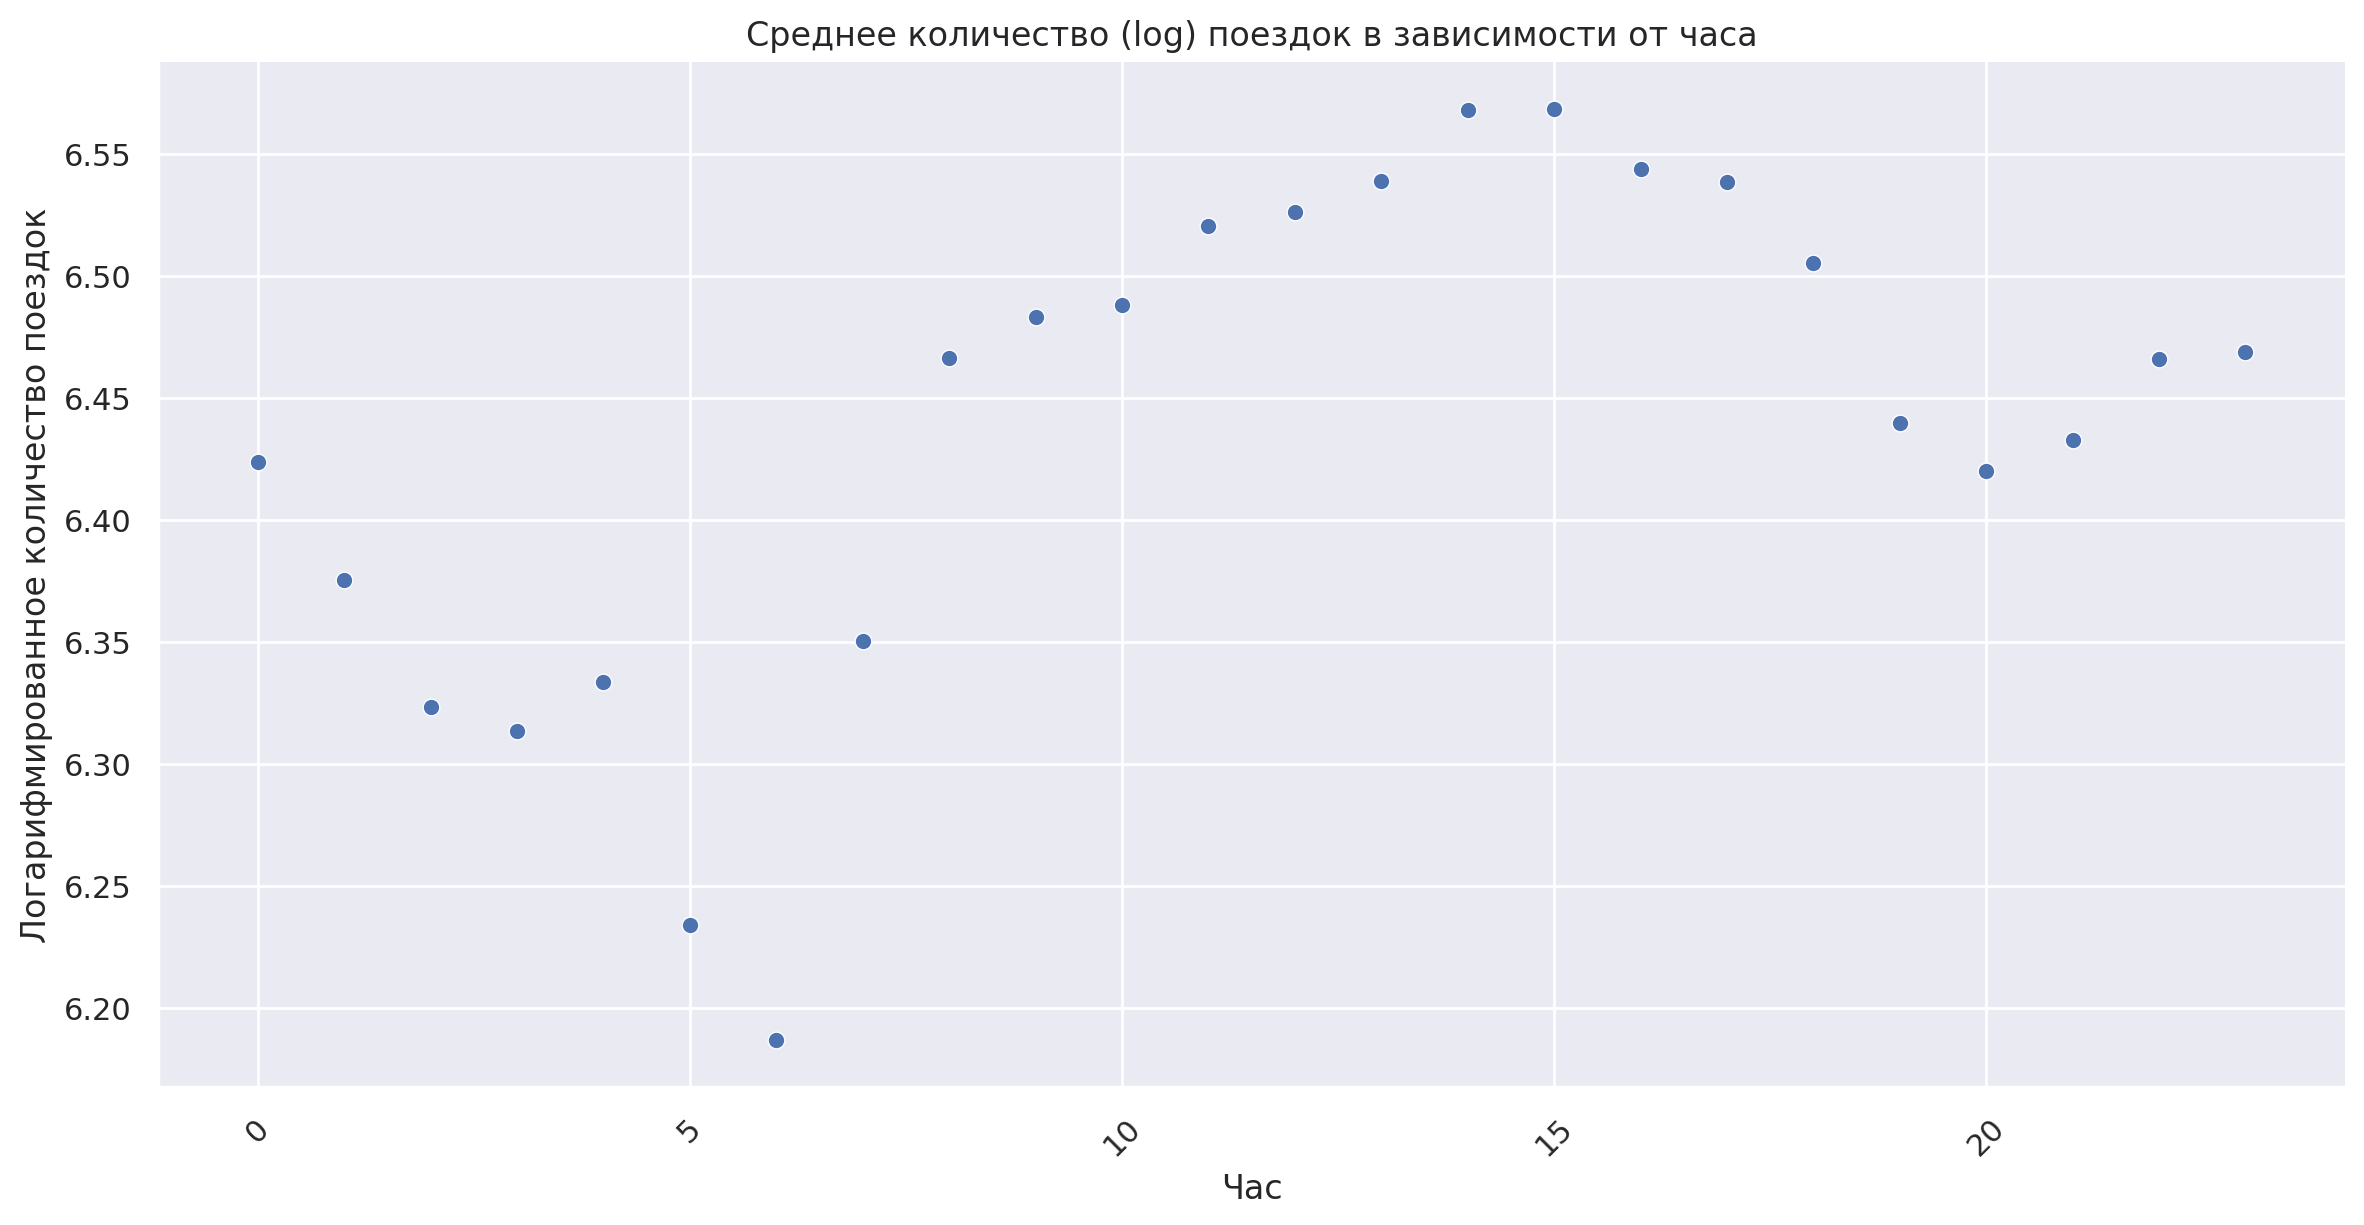

In [25]:
hours = X_train.groupby(X_train['pickup_datetime'].dt.hour)['log_trip_duration'].mean().reset_index()
sns.relplot(data=hours, y='log_trip_duration', x='pickup_datetime', height=6, aspect=2)
plt.title('Среднее количество (log) поездок в зависимости от часа')
plt.xlabel('Час')
plt.ylabel('Логарифмированное количество поездок')
plt.xticks(rotation=45)
plt.show()

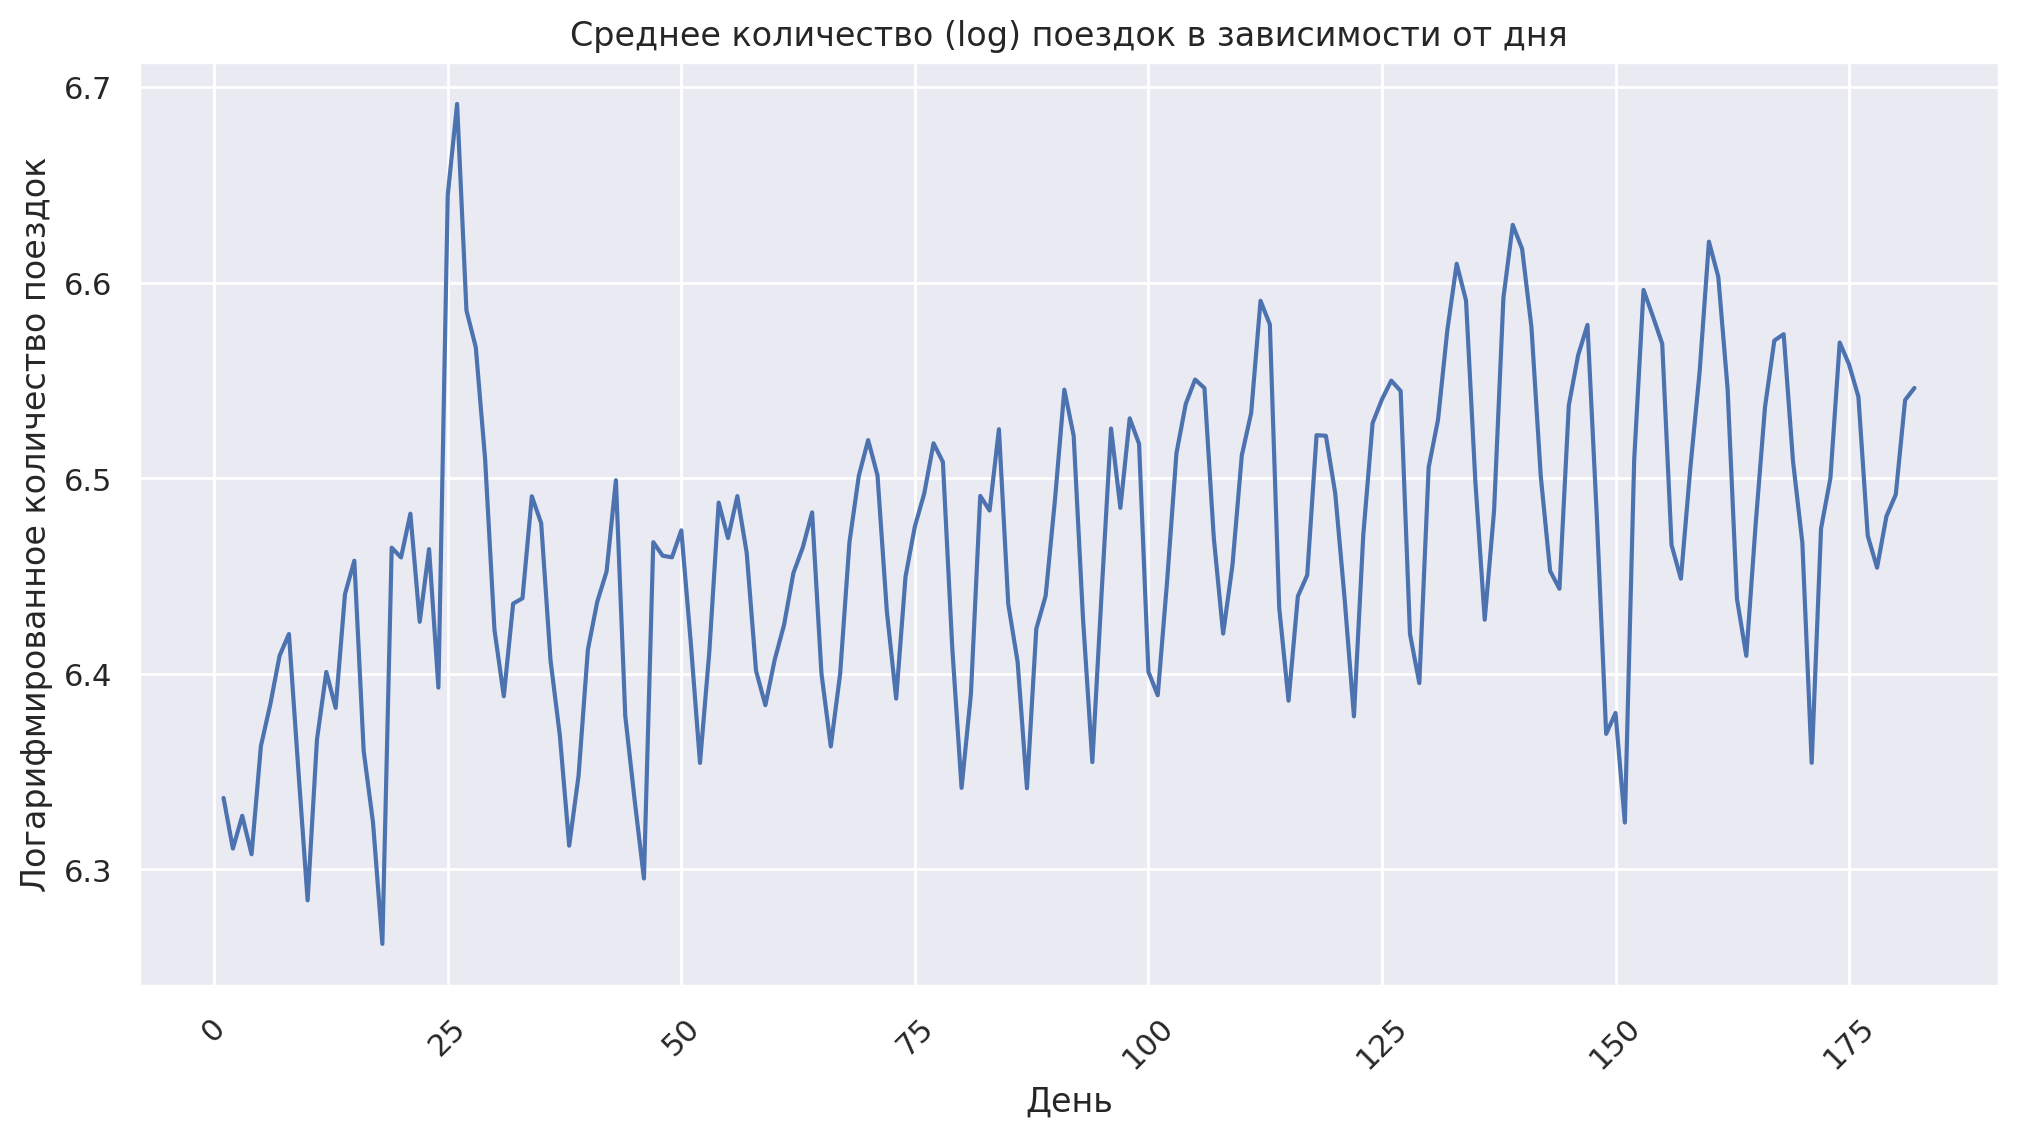

In [26]:
days = X_train.groupby(X_train['pickup_datetime'].dt.dayofyear)['log_trip_duration'].mean().reset_index()
sns.lineplot(data=days, y='log_trip_duration', x='pickup_datetime')
plt.title('Среднее количество (log) поездок в зависимости от дня')
plt.xlabel('День')
plt.ylabel('Логарифмированное количество поездок')
plt.xticks(rotation=45)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики зависимости могут быть похожими в некоторых случаях, потому что оба параметра могут зависеть от одних и тех же параметров.

In [27]:
print(days.loc[23], days.loc[22], days.mean())

pickup_datetime      24.000000
log_trip_duration     6.392959
Name: 23, dtype: float64 pickup_datetime      23.000000
log_trip_duration     6.463779
Name: 22, dtype: float64 pickup_datetime      91.500000
log_trip_duration     6.465268
dtype: float64


В аномальные периода мы наблюдаем, что показатели там средние, а не аномальные как в количестве поездок, видимо это происходит потому что маленькое количество поездок не повлияло на длительность поездки, как и снежная буря.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [28]:
daily_trip_counts = df.groupby(df['pickup_datetime'].dt.dayofyear)[['id']].count().reset_index()
daily_trip_counts.rename(columns={'id': 'count'}, inplace=True)

anomalous_days = daily_trip_counts[daily_trip_counts['count'] < (daily_trip_counts['count'].mean() - 3 * daily_trip_counts['count'].std())]

In [29]:
def add_new_features(df):
    df['day_of_week'] = df['pickup_datetime'].dt.day_name()
    df['month'] = df['pickup_datetime'].dt.month_name()
    df['hour'] = df['pickup_datetime'].dt.hour
    df['is_anomaly'] = df['pickup_datetime'].dt.dayofyear.isin(anomalous_days['pickup_datetime'])
    df['day_of_year'] = df['pickup_datetime'].dt.dayofyear

add_new_features(X_train)
add_new_features(X_test)
add_new_features(df)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Я бы все добавленные признаки отнёс к категориальным.
Поскольку мы не можем проводить над ними арифметические операции. (Например что такое день + день?)


**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge


categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.7871


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [31]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [32]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [33]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Хорошо выделяется аэропорт и вокзал, заказы такси в таком месте могут иметь особые характеристики, такие как более длительные поездки или пики активности в определенное время дня (например, в часы прилета и вылета рейсов).

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [34]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df['haversine'] = haversine_array(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [35]:
df['log_haversine'] = np.log1p(df['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [36]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [37]:
df['v_average'] = (df['haversine'] / df['trip_duration']) * 3600

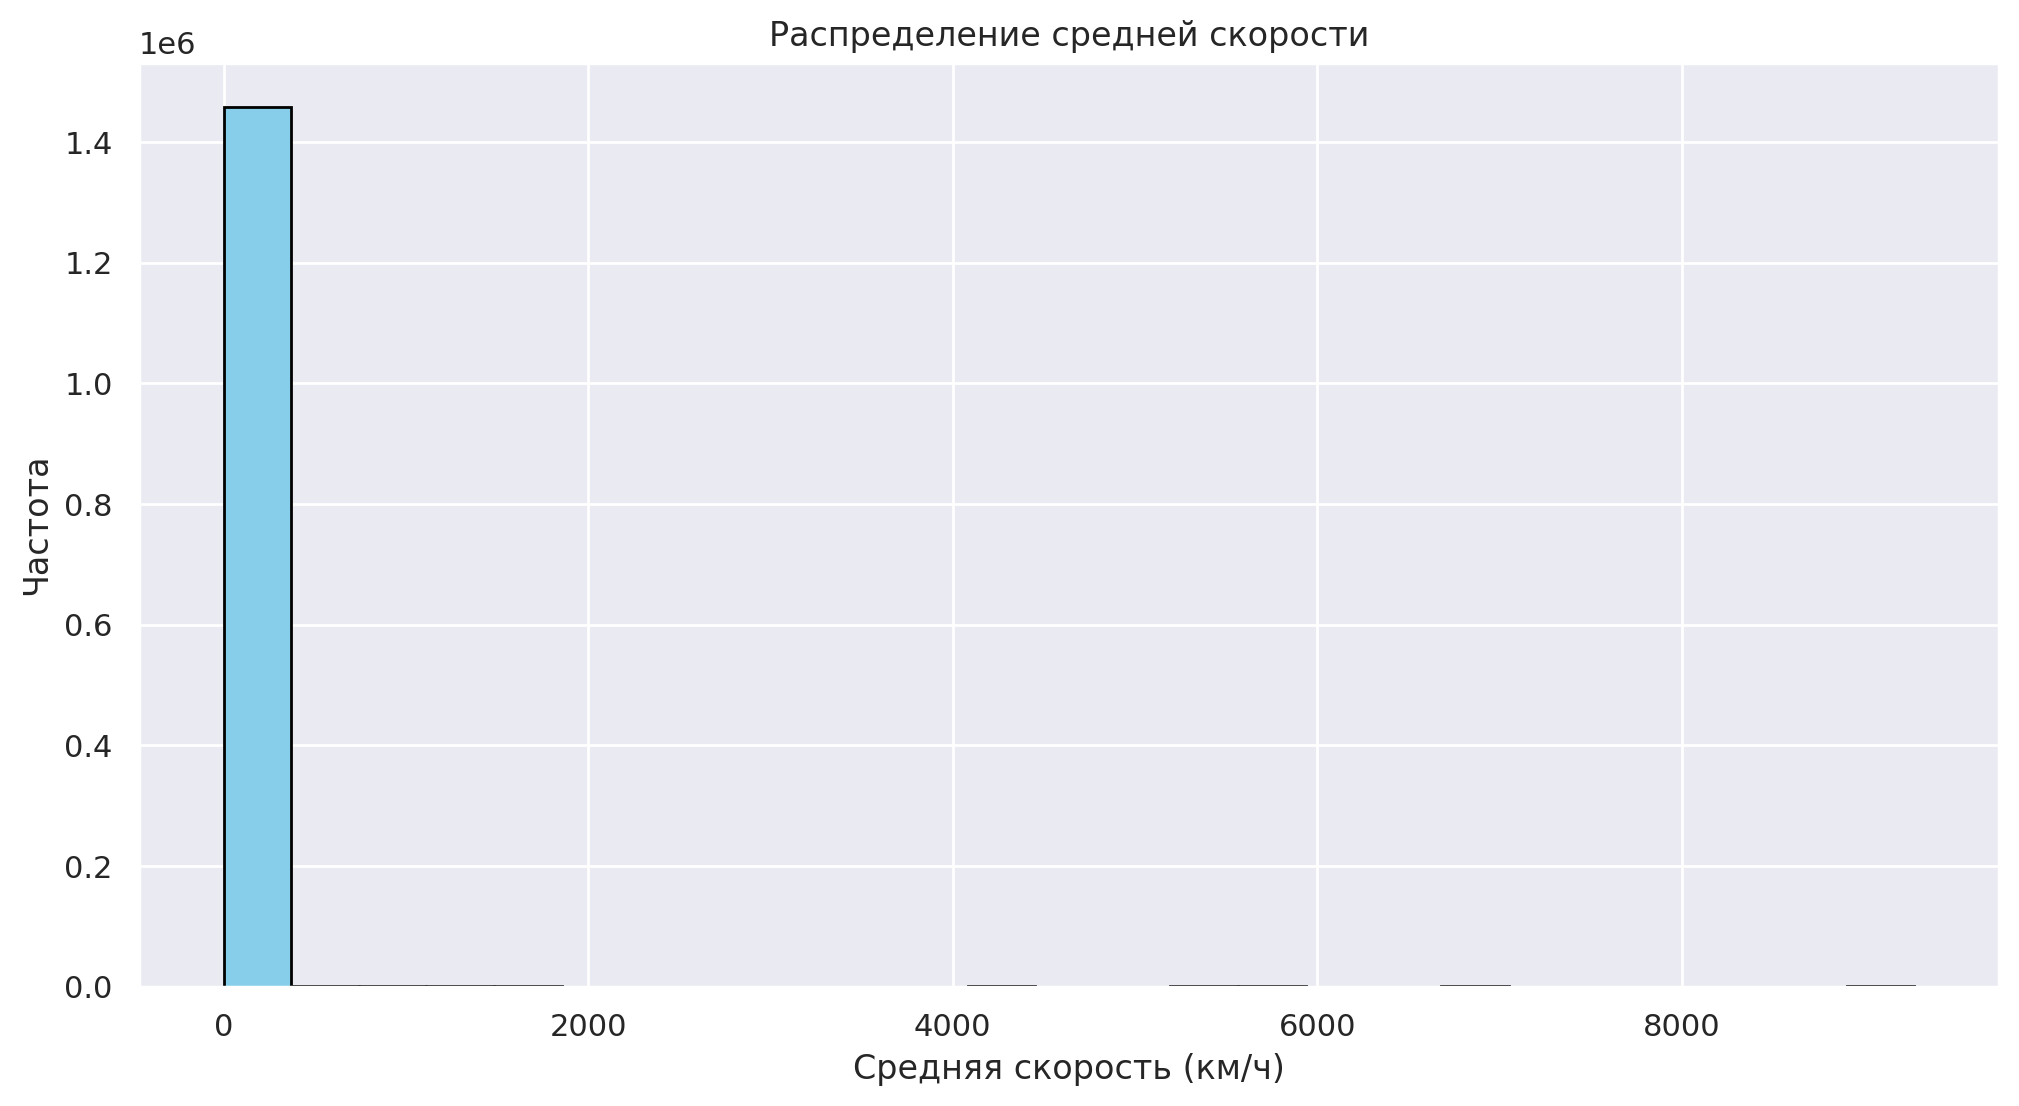

In [38]:
plt.hist(df['v_average'], bins=25, color='skyblue', edgecolor='black')
plt.title('Распределение средней скорости')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [39]:
average = df[df['v_average'] < np.percentile(df['v_average'], 95)]

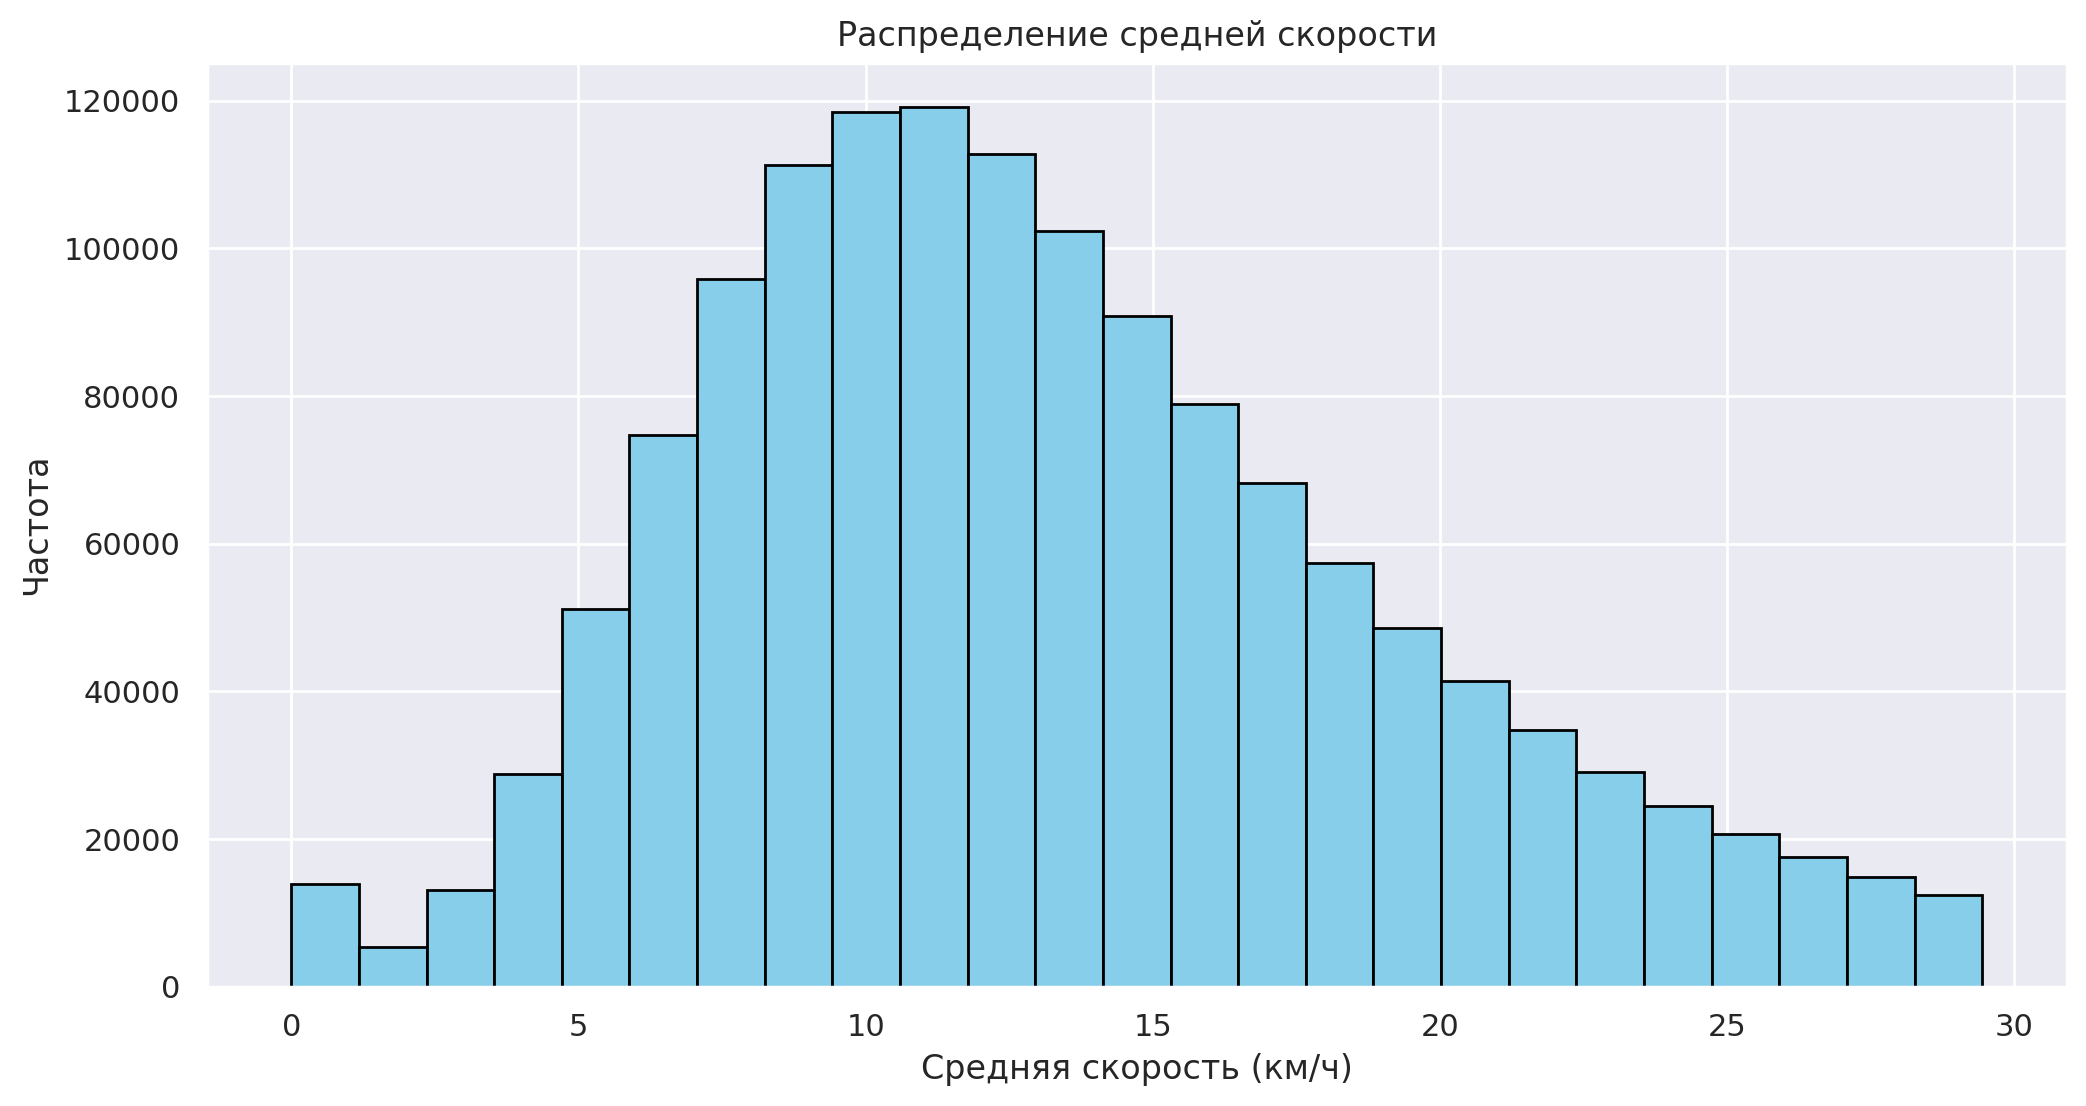

In [40]:
plt.hist(average['v_average'], bins=25, color='skyblue', edgecolor='black')
plt.title('Распределение средней скорости')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

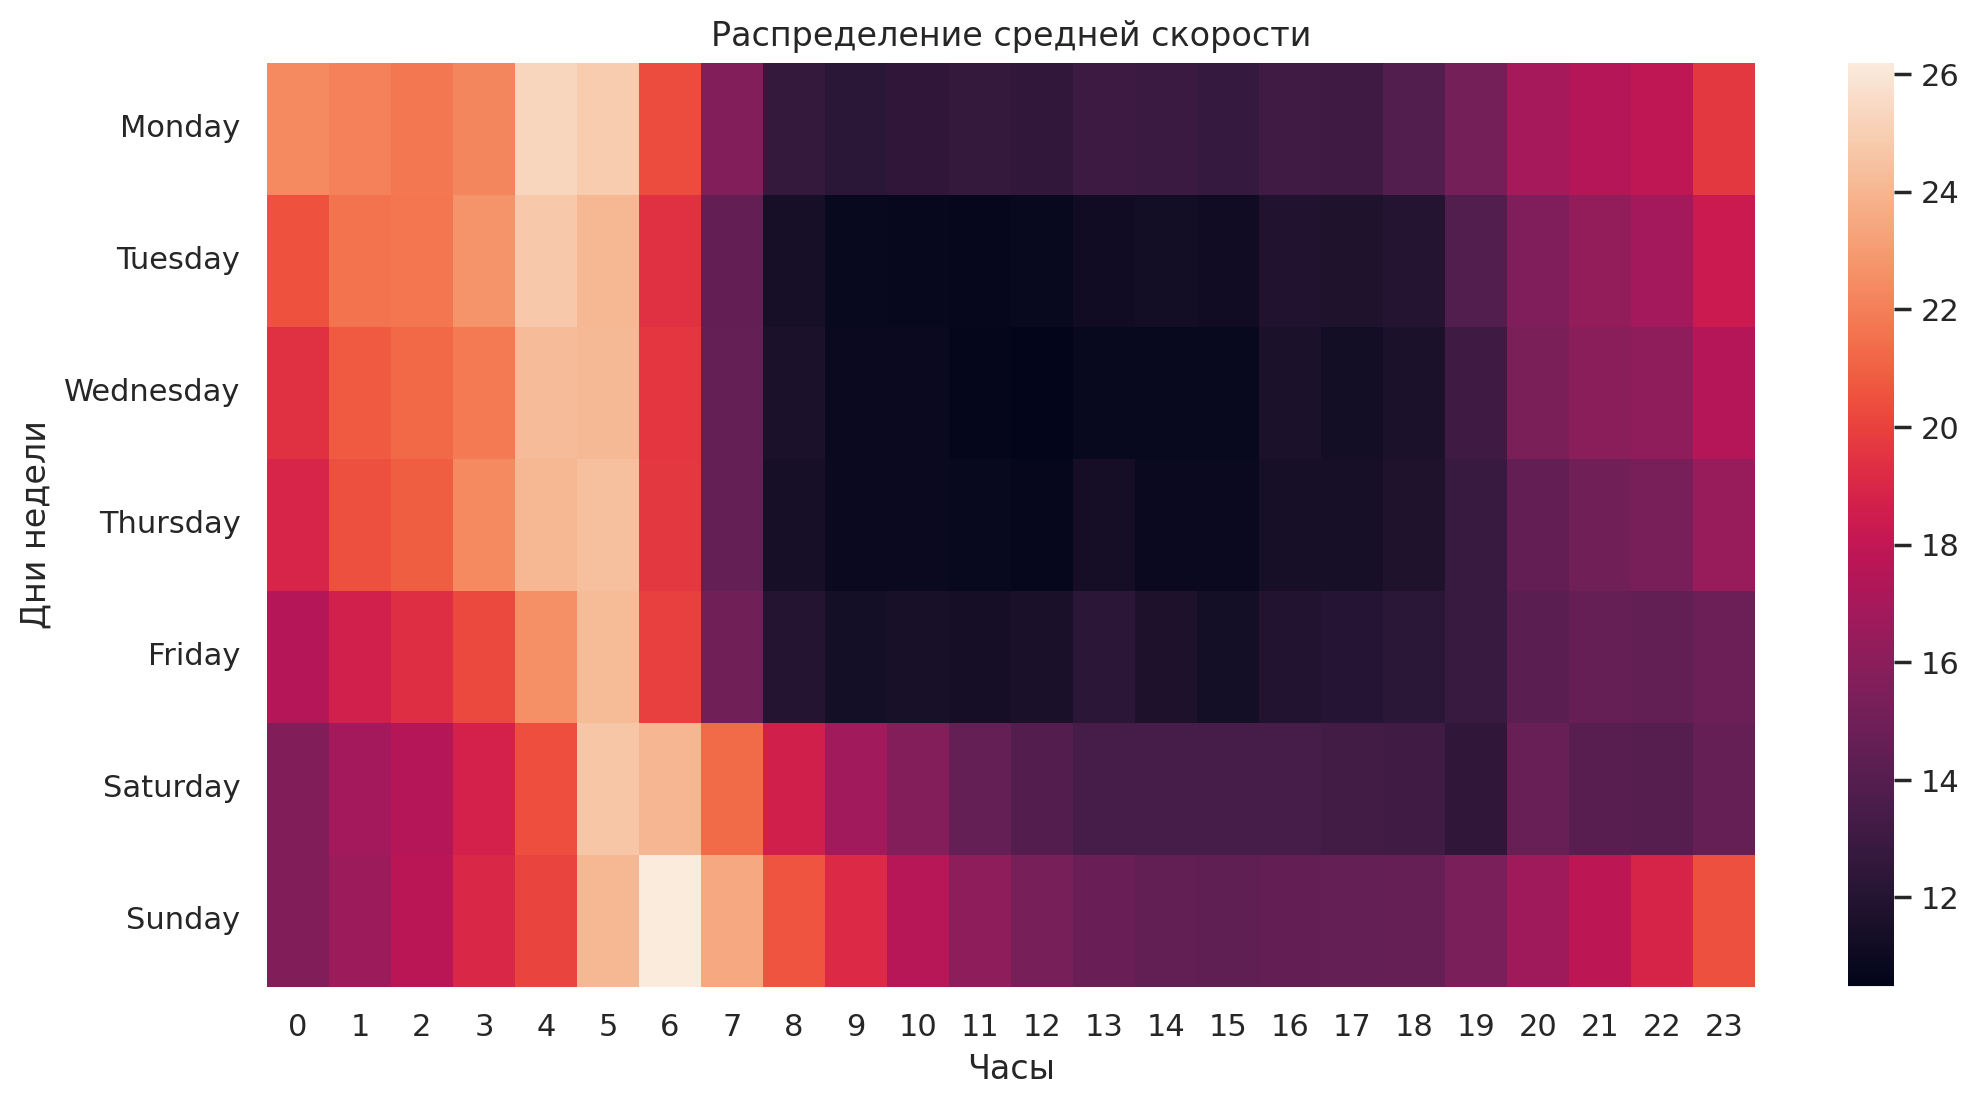

In [41]:
from pandas.api.types import CategoricalDtype

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_cat = CategoricalDtype(categories=day_order, ordered=True)

df['day_of_week'] = df['day_of_week'].astype(day_of_week_cat)

data = df.groupby(by=['day_of_week', 'hour'])[['v_average']].mean().reset_index()

sns.heatmap(data.pivot(index='day_of_week', columns='hour' ,values='v_average'))
plt.title('Распределение средней скорости')
plt.xlabel('Часы')
plt.ylabel('Дни недели')
plt.grid(True)

plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [42]:
_ = df.drop(columns=['v_average'], inplace=True)

Потому что средняя скорость зависит от времени, которое мы предсказываем, то есть по сути предсказание времени поездки и предсказание скорости одна и та же задача. 

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Судя по графику максимальная скорость в районе 5 часов утра в любой из дней, а минимальная в районе 17-18.

Так можно сказать, что поездка совершается в период пробок в 8-18, а свободных в другое время.

In [43]:
df['traffic-jams'] = (df['hour'].isin(range(8, 19))) | (df['day_of_week'].isin(('Tuesday', 'Wednesday')) & df['hour'].isin(range(13, 19))) 

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [44]:
def get_anomalies_trip(location, eps, lat_col, long_col, dataframe):
    return df[(abs(dataframe[lat_col] - location[0]) <= eps) & (abs(dataframe[long_col] - location[1]) <= eps)]

In [45]:
john_airport = (40.647390, -73.784965)
la_gv_airport = (40.773573, -73.872137)

eps = 0.01
loc = (john_airport, la_gv_airport)

john_trip_start = get_anomalies_trip(john_airport, eps, 'pickup_latitude', 'pickup_longitude', df)
john_trip_end = get_anomalies_trip(john_airport, eps, 'dropoff_latitude', 'dropoff_longitude', df)

la_gv_start = get_anomalies_trip(la_gv_airport, eps, 'pickup_latitude', 'pickup_longitude', df)
la_gv_end = get_anomalies_trip(la_gv_airport, eps, 'dropoff_latitude', 'dropoff_longitude', df)

In [46]:
assert df.shape[0] == len(set(df['id']))

In [47]:
df['start_in_john_airp'] = df['id'].isin(john_trip_start['id'])
df['end_in_john_airp'] = df['id'].isin(john_trip_end['id'])

df['start_in_la_gv_airp'] = df['id'].isin(la_gv_start['id'])
df['end_in_la_gv_airp'] = df['id'].isin(la_gv_end['id'])

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

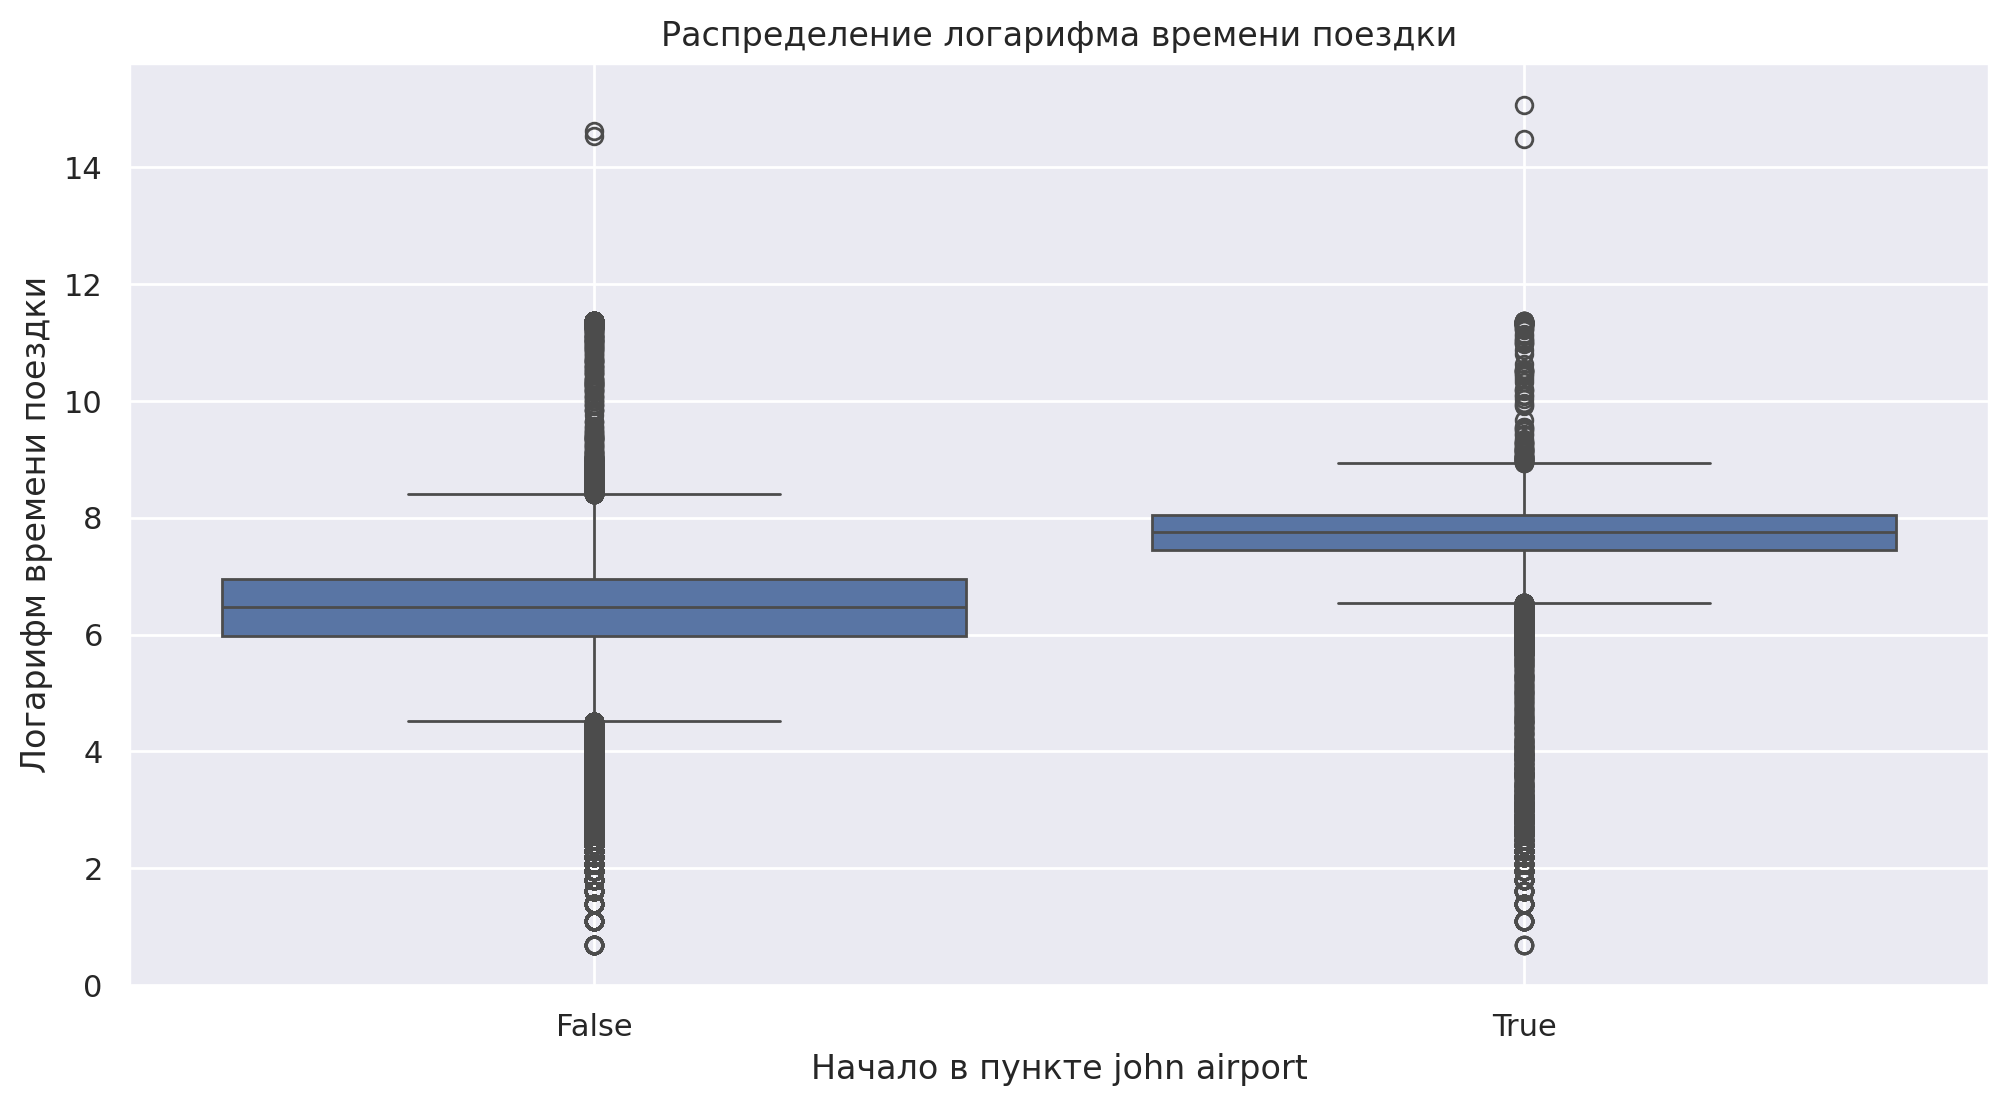

In [48]:
sns.boxplot(df, x='start_in_john_airp', y='log_trip_duration')
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Начало в пункте john airport')
plt.ylabel('Логарифм времени поездки')
plt.grid(True)

plt.show()

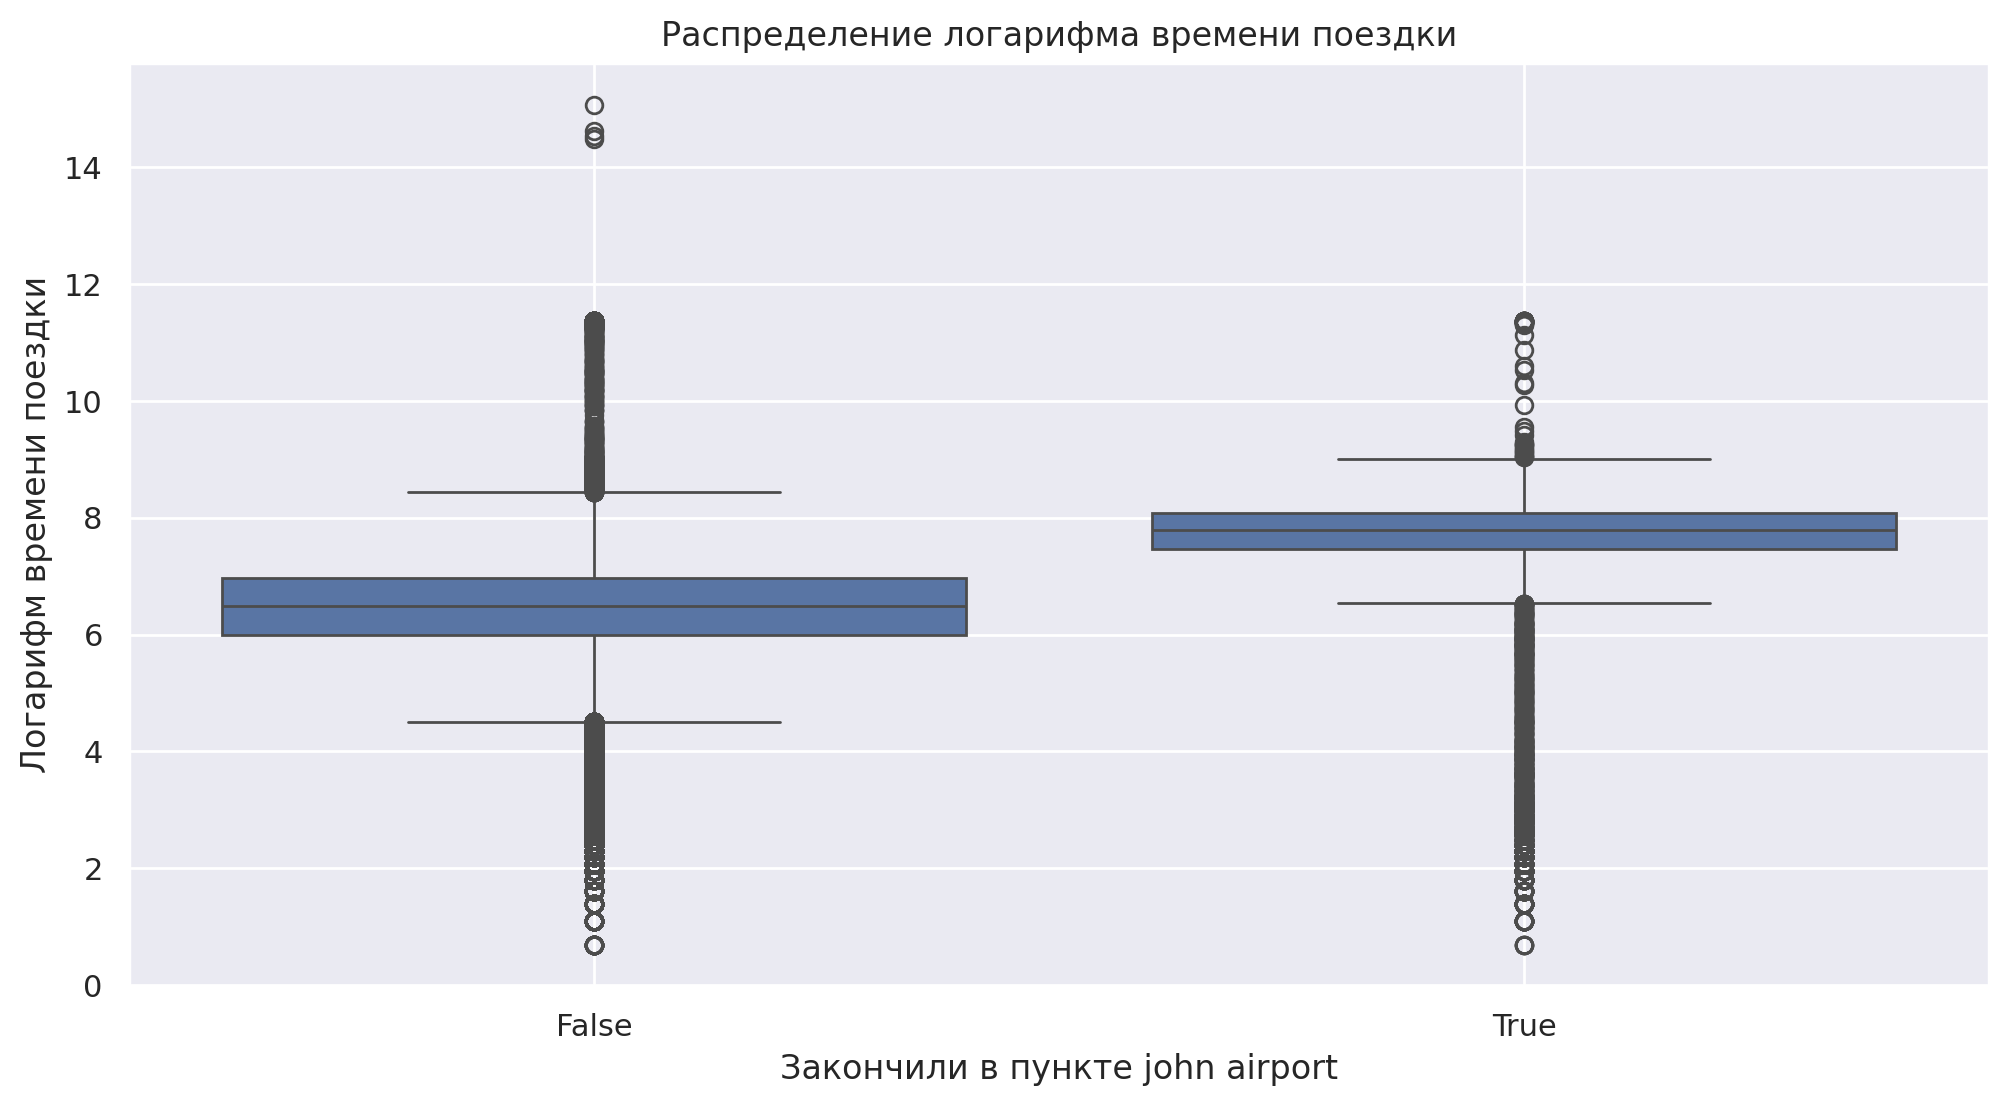

In [49]:
sns.boxplot(df, x='end_in_john_airp', y='log_trip_duration')
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Закончили в пункте john airport')
plt.ylabel('Логарифм времени поездки')
plt.grid(True)

plt.show()

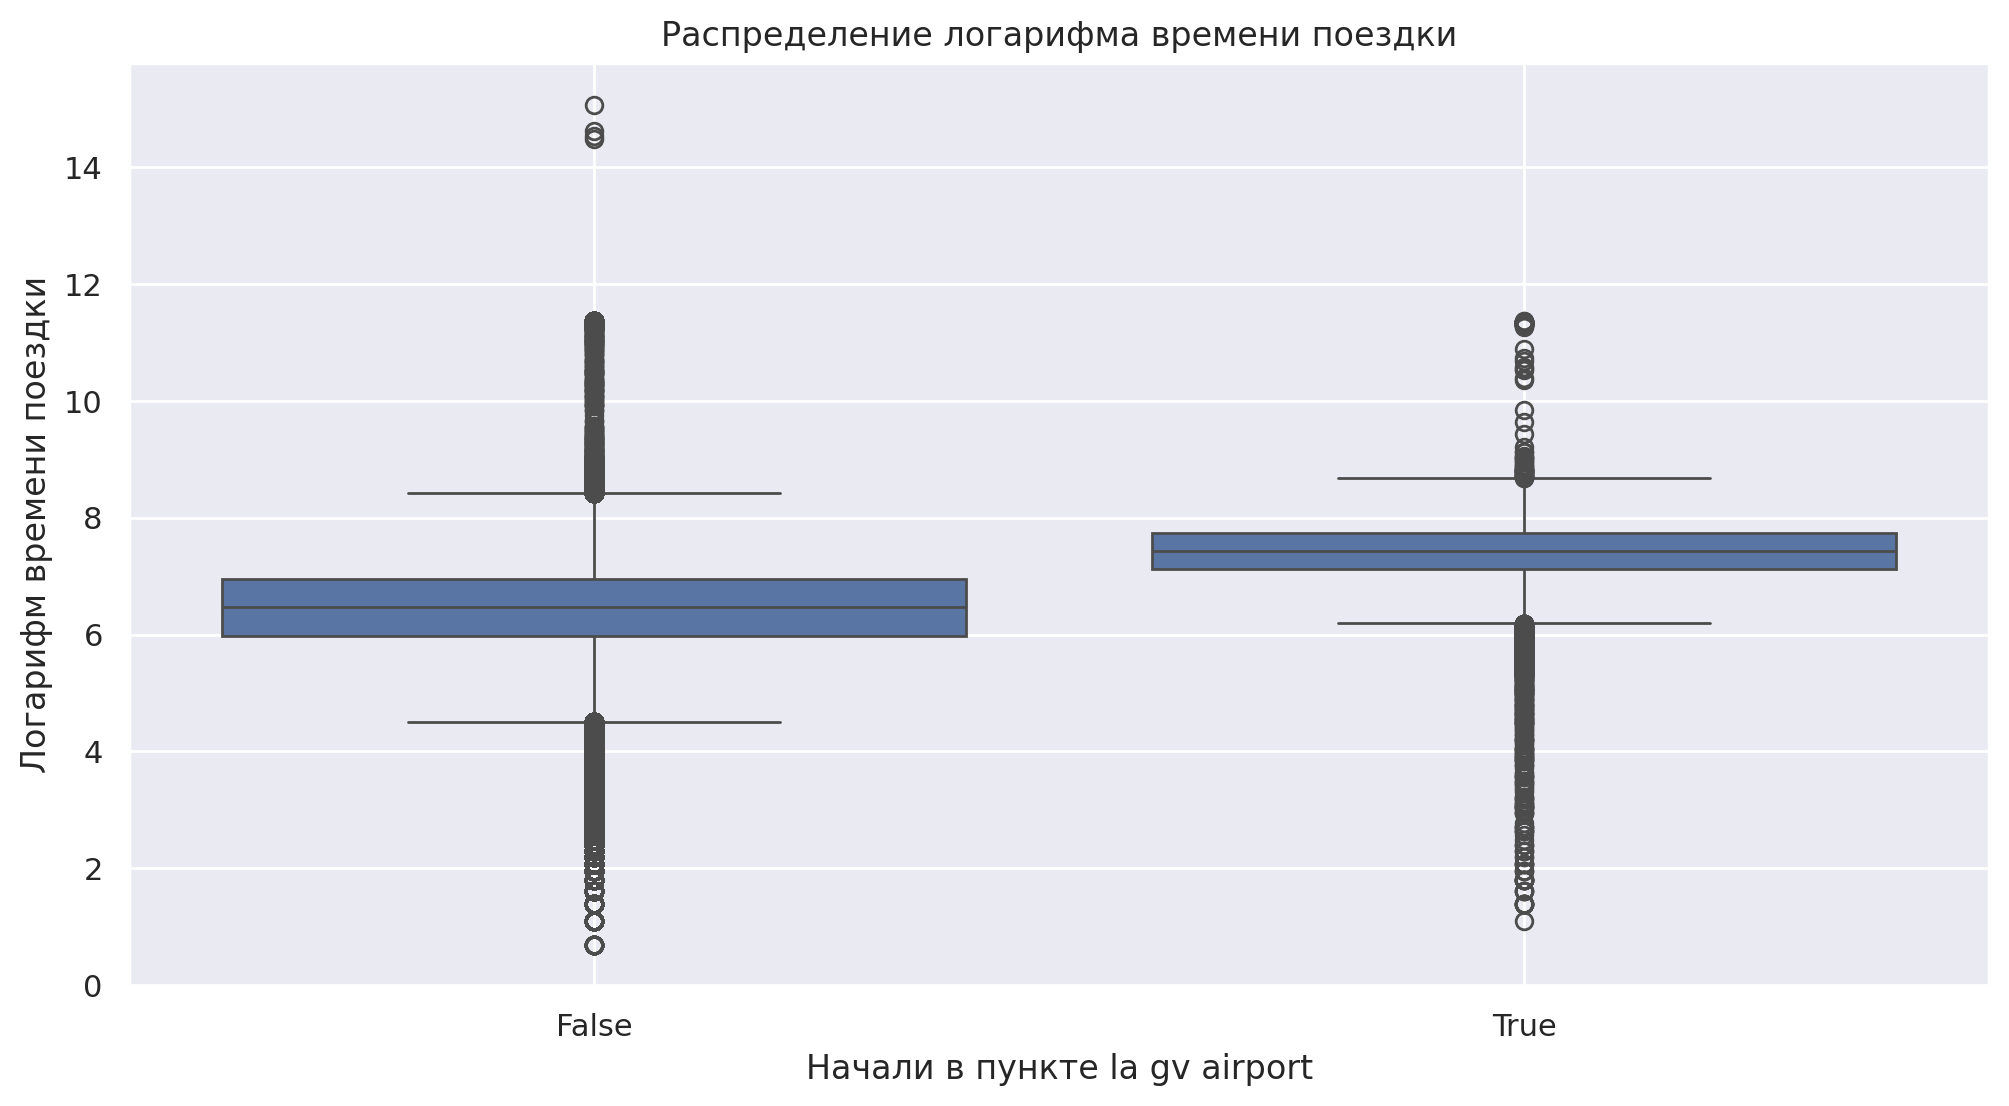

In [50]:
sns.boxplot(df, x='start_in_la_gv_airp', y='log_trip_duration')
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Начали в пункте la gv airport')
plt.ylabel('Логарифм времени поездки')
plt.grid(True)

plt.show()

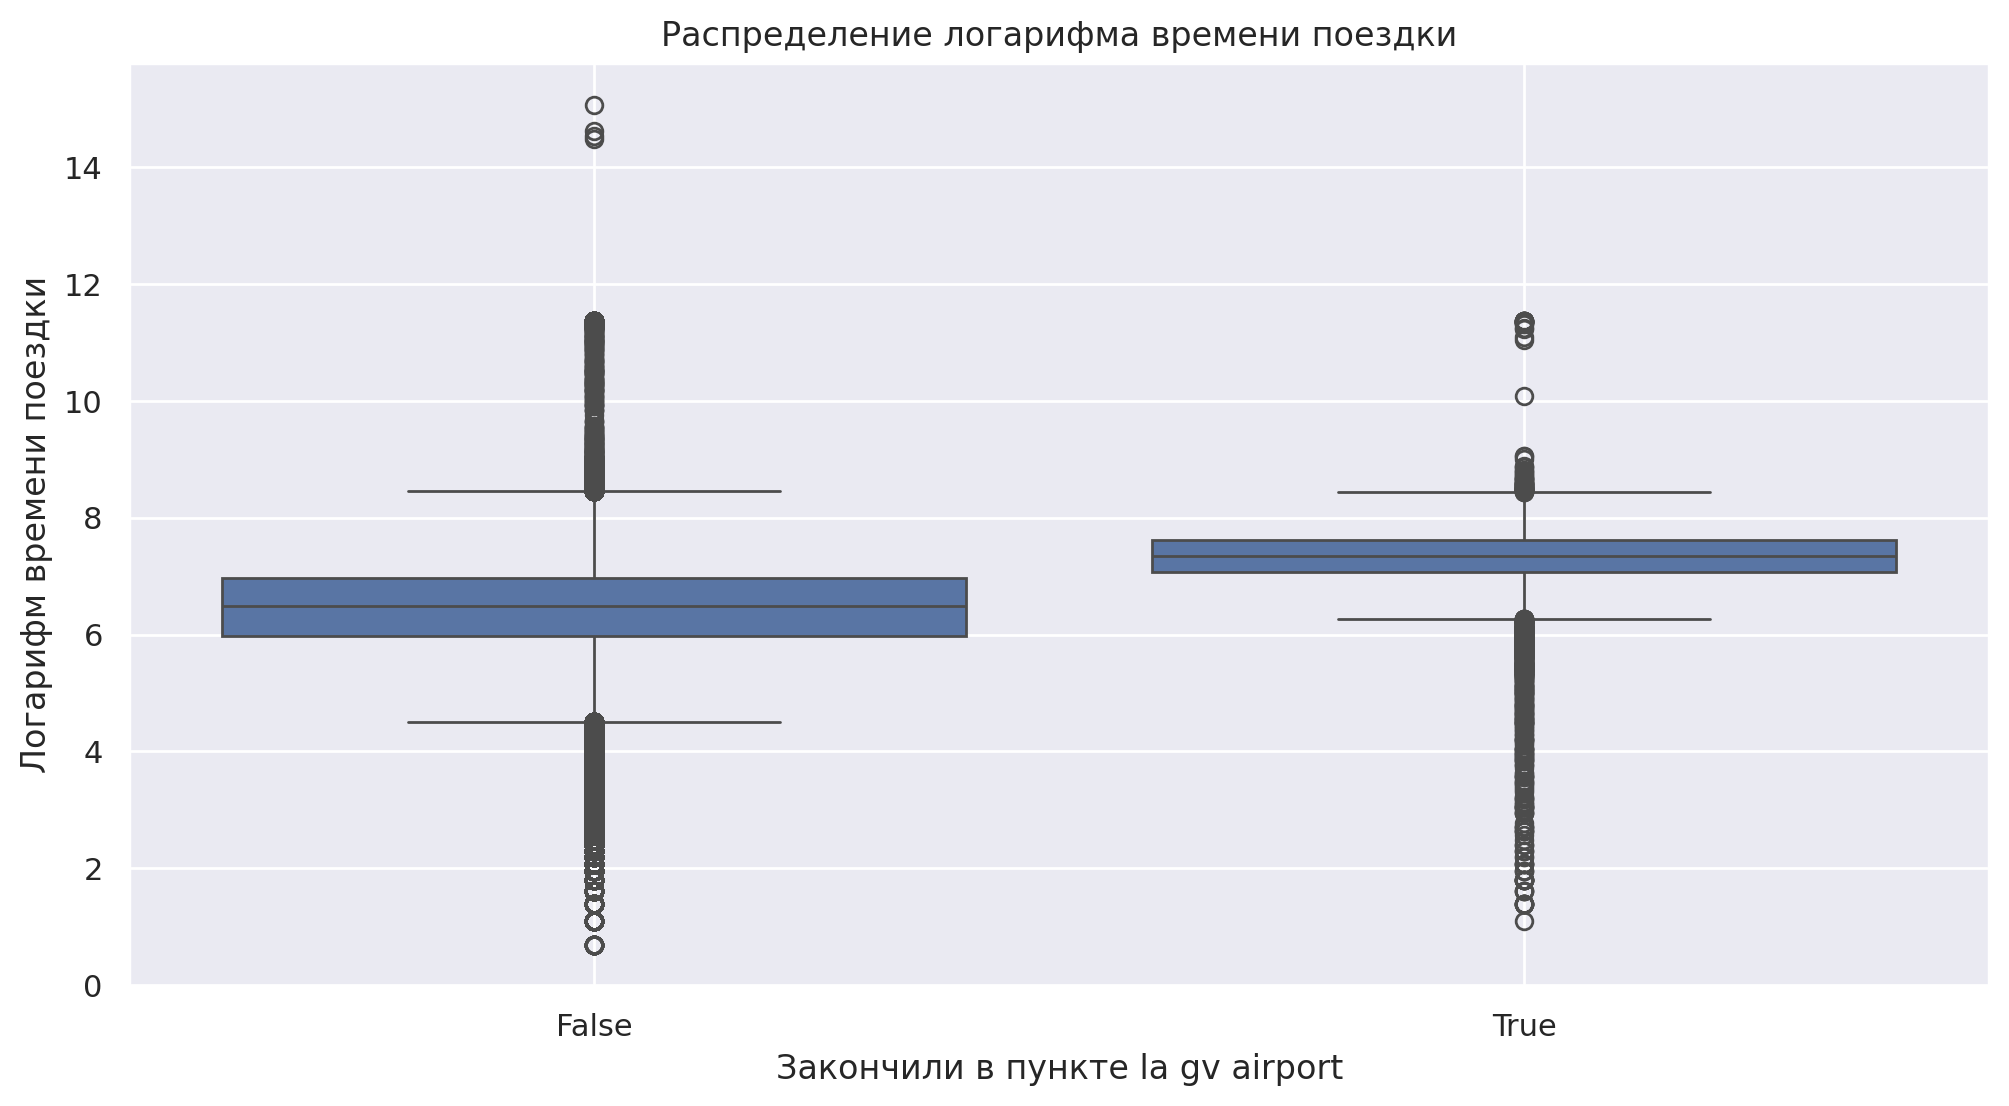

In [51]:
sns.boxplot(df, x='end_in_la_gv_airp', y='log_trip_duration')
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Закончили в пункте la gv airport')
plt.ylabel('Логарифм времени поездки')
plt.grid(True)

plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Я думаю признаки получились хорошими, т.к. медианное значение для этих признаков получилось разное (median True != median False)

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [52]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, X, grid_size=(10, 10)):
        self.grid_size = grid_size
        self.grid = None
        self.X = X.copy()
        self.location = (self.X["dropoff_latitude"].mean(), self.X["dropoff_longitude"].mean())


    def fit(self):
        self.min_lat, self.max_lat = self.X.sample(1000)['pickup_latitude'].min(), self.X.sample(1000)['pickup_latitude'].max()
        self.min_lon, self.max_lon = self.X.sample(1000)['pickup_longitude'].min(), self.X.sample(1000)['pickup_longitude'].max()
        lat_step = (self.max_lat - self.min_lat) / self.grid_size[0]
        lon_step = (self.max_lon - self.min_lon) / self.grid_size[1]
        self.grid = [(self.min_lat + i * lat_step, self.min_lon + j * lon_step)
                     for i in range(self.grid_size[0])
                     for j in range(self.grid_size[1])]
        return self

    def transfor(self):
        def find_cell(lat, lon):
            for i, (cell_lat, cell_lon) in enumerate(self.grid):
                if lat <= cell_lat and lat >= cell_lat - (self.max_lat - self.min_lat) / self.grid_size[0] and \
                   lon <= cell_lon and lon >= cell_lon - (self.max_lon - self.min_lon) / self.grid_size[1]:
                    return i
            return -1

        self.X['pickup_cell'] = self.X.apply(lambda row: find_cell(row['pickup_latitude'], row['pickup_longitude']), axis=1)
        self.X['dropoff_cell'] = self.X.apply(lambda row: find_cell(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
        return self.X

    def show_map(self):
        m = folium.Map(location=self.location, zoom_start=10)

        for lat, lon in self.grid:
            folium.Rectangle(
                bounds=[[lat, lon], [lat + (self.max_lat - self.min_lat) / self.grid_size[0], lon + (self.max_lon - self.min_lon) / self.grid_size[1]]],
                color='blue',
                fill=True,
                fill_color='blue',
                fill_opacity=0.2
            ).add_to(m)
        return m

In [53]:
mgt = MapGridTransformer(df)
mgt = mgt.fit()
mgt.transfor()
mgt.show_map()

In [54]:
df['pickup_cell'] = mgt.X['pickup_cell']
df['dropoff_cell'] = mgt.X['dropoff_cell']

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.3, random_state=42)

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler



categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.4729


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.


От этих признаков может зависеть время поездки, так например как правило если пассажиров несколько, то поездка может затянуться из-за наличия нескольких остановок для каждого пассажира, и не всегда они будут по пути.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [57]:
vendor = len(set(df['vendor_id']))
passenger = len(set(df['passenger_count']))
store = len(set(df['store_and_fwd_flag']))

print(f"Количество уникальных значений: \nvendor - {vendor}\npassenger - {passenger}\nstore - {store}")

Количество уникальных значений: 
vendor - 2
passenger - 10
store - 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

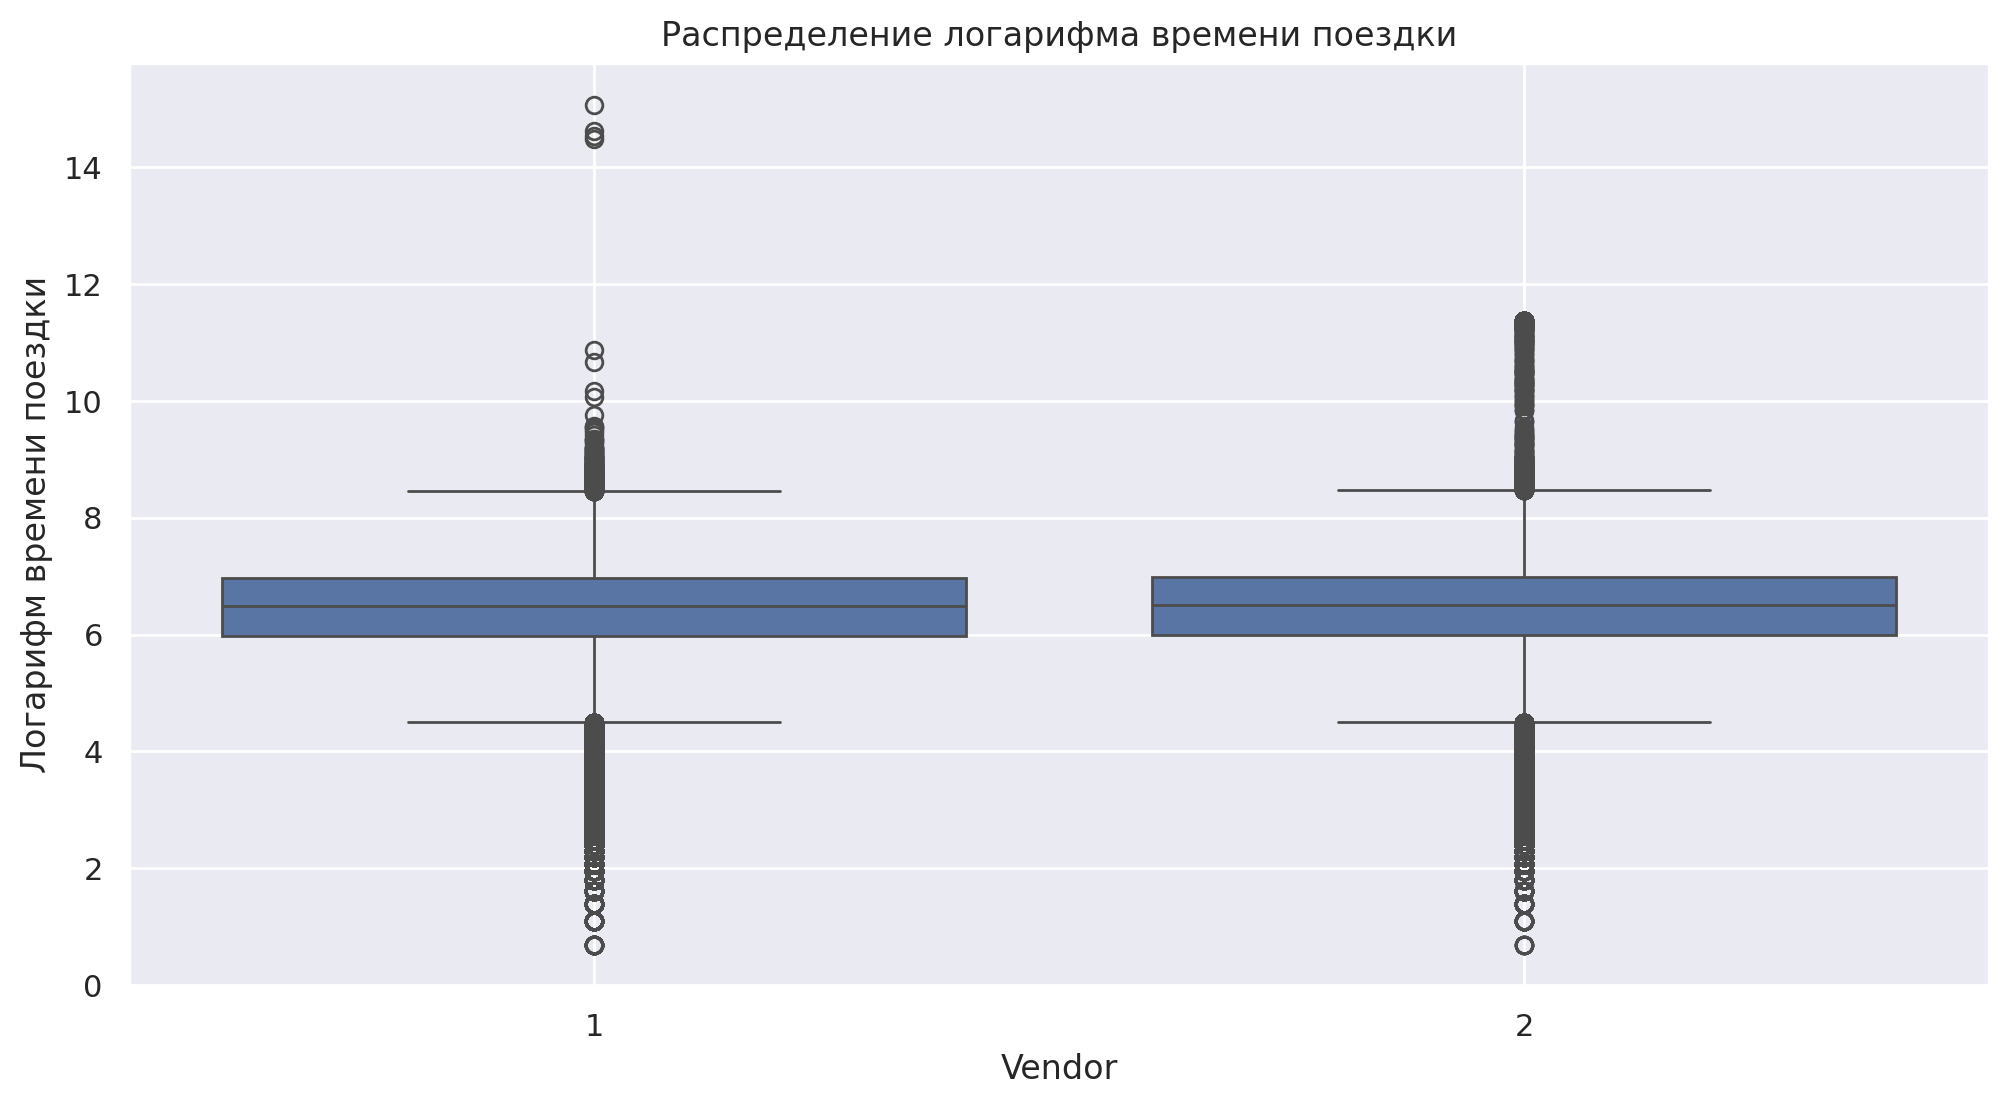

In [58]:
sns.boxplot(df, x='vendor_id', y='log_trip_duration')
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Vendor')
plt.ylabel('Логарифм времени поездки')
plt.grid(True)

plt.show()

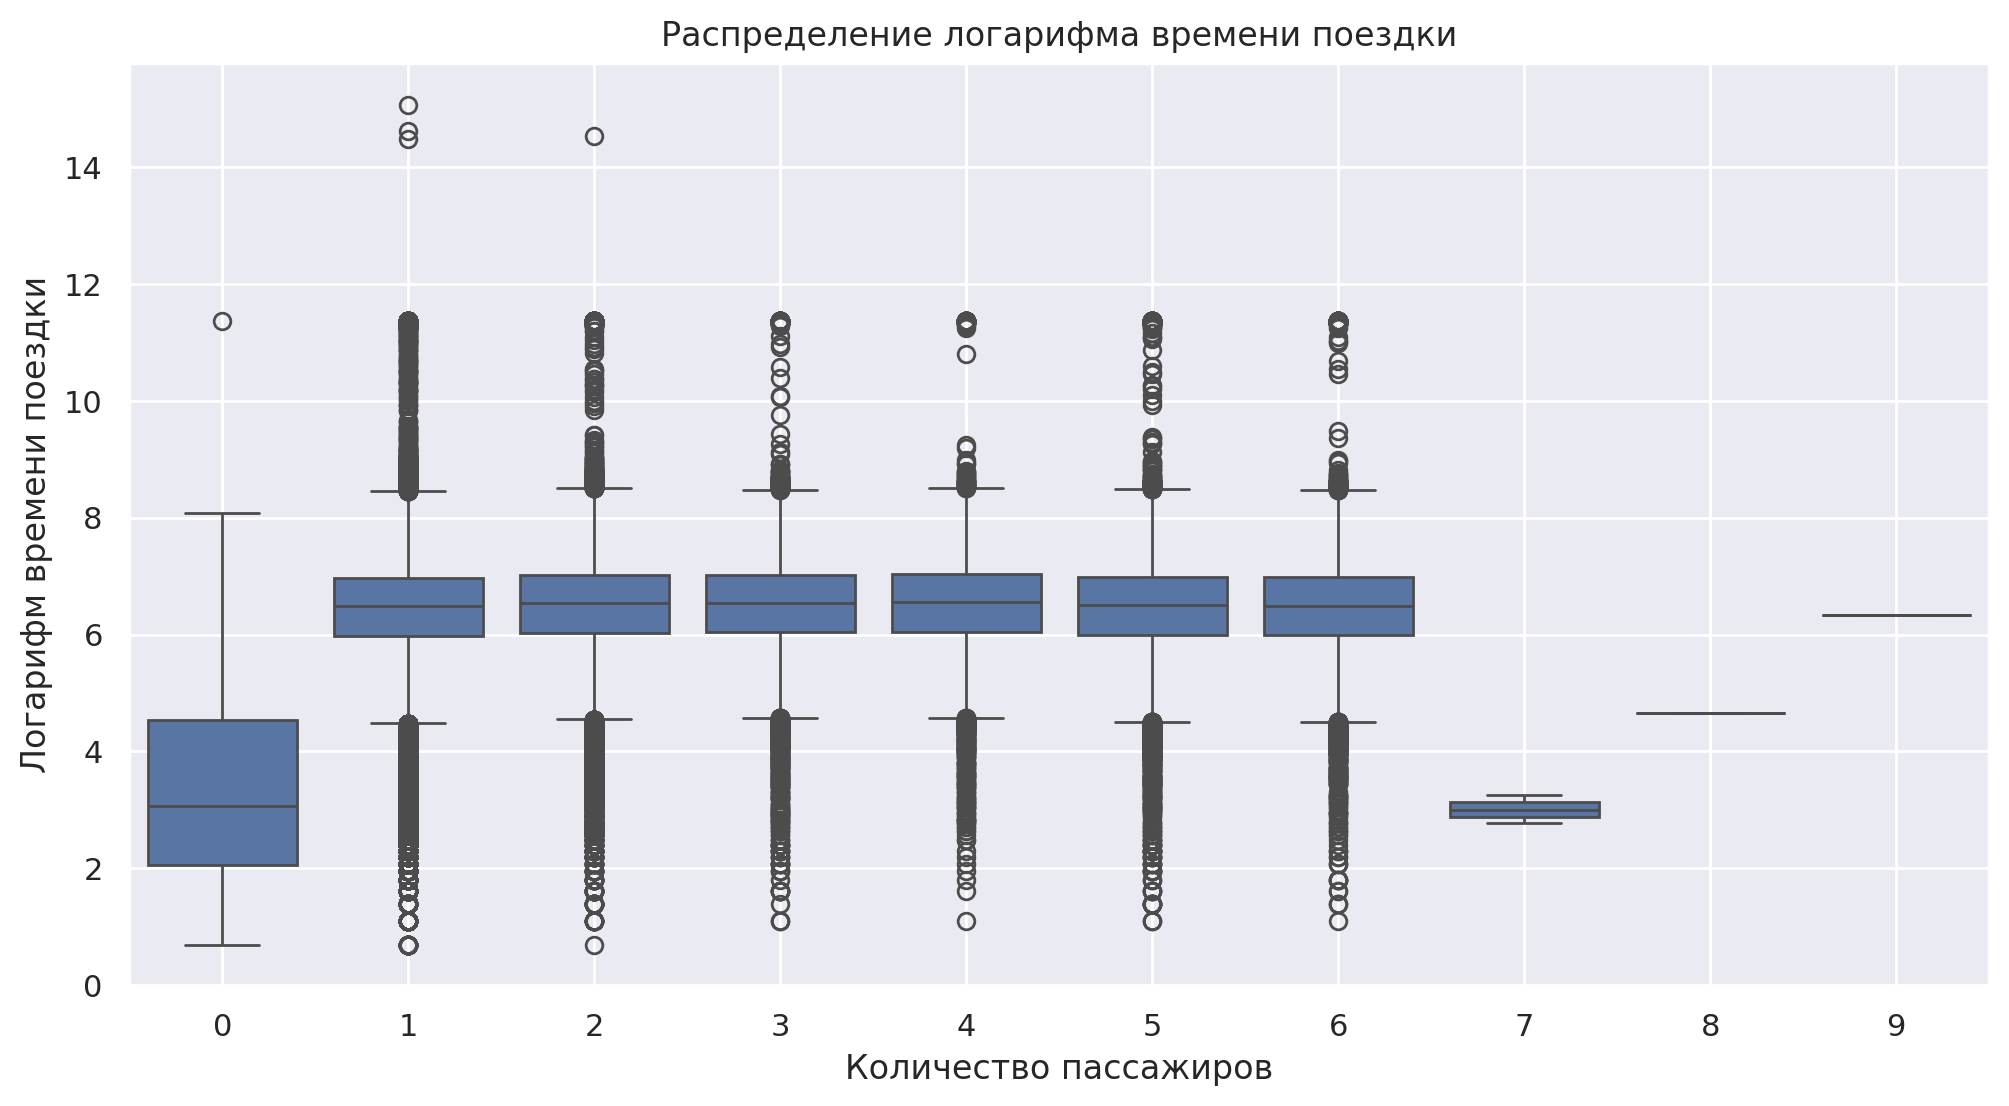

In [59]:
sns.boxplot(df, x='passenger_count', y='log_trip_duration')
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Количество пассажиров')
plt.ylabel('Логарифм времени поездки')
plt.grid(True)

plt.show()

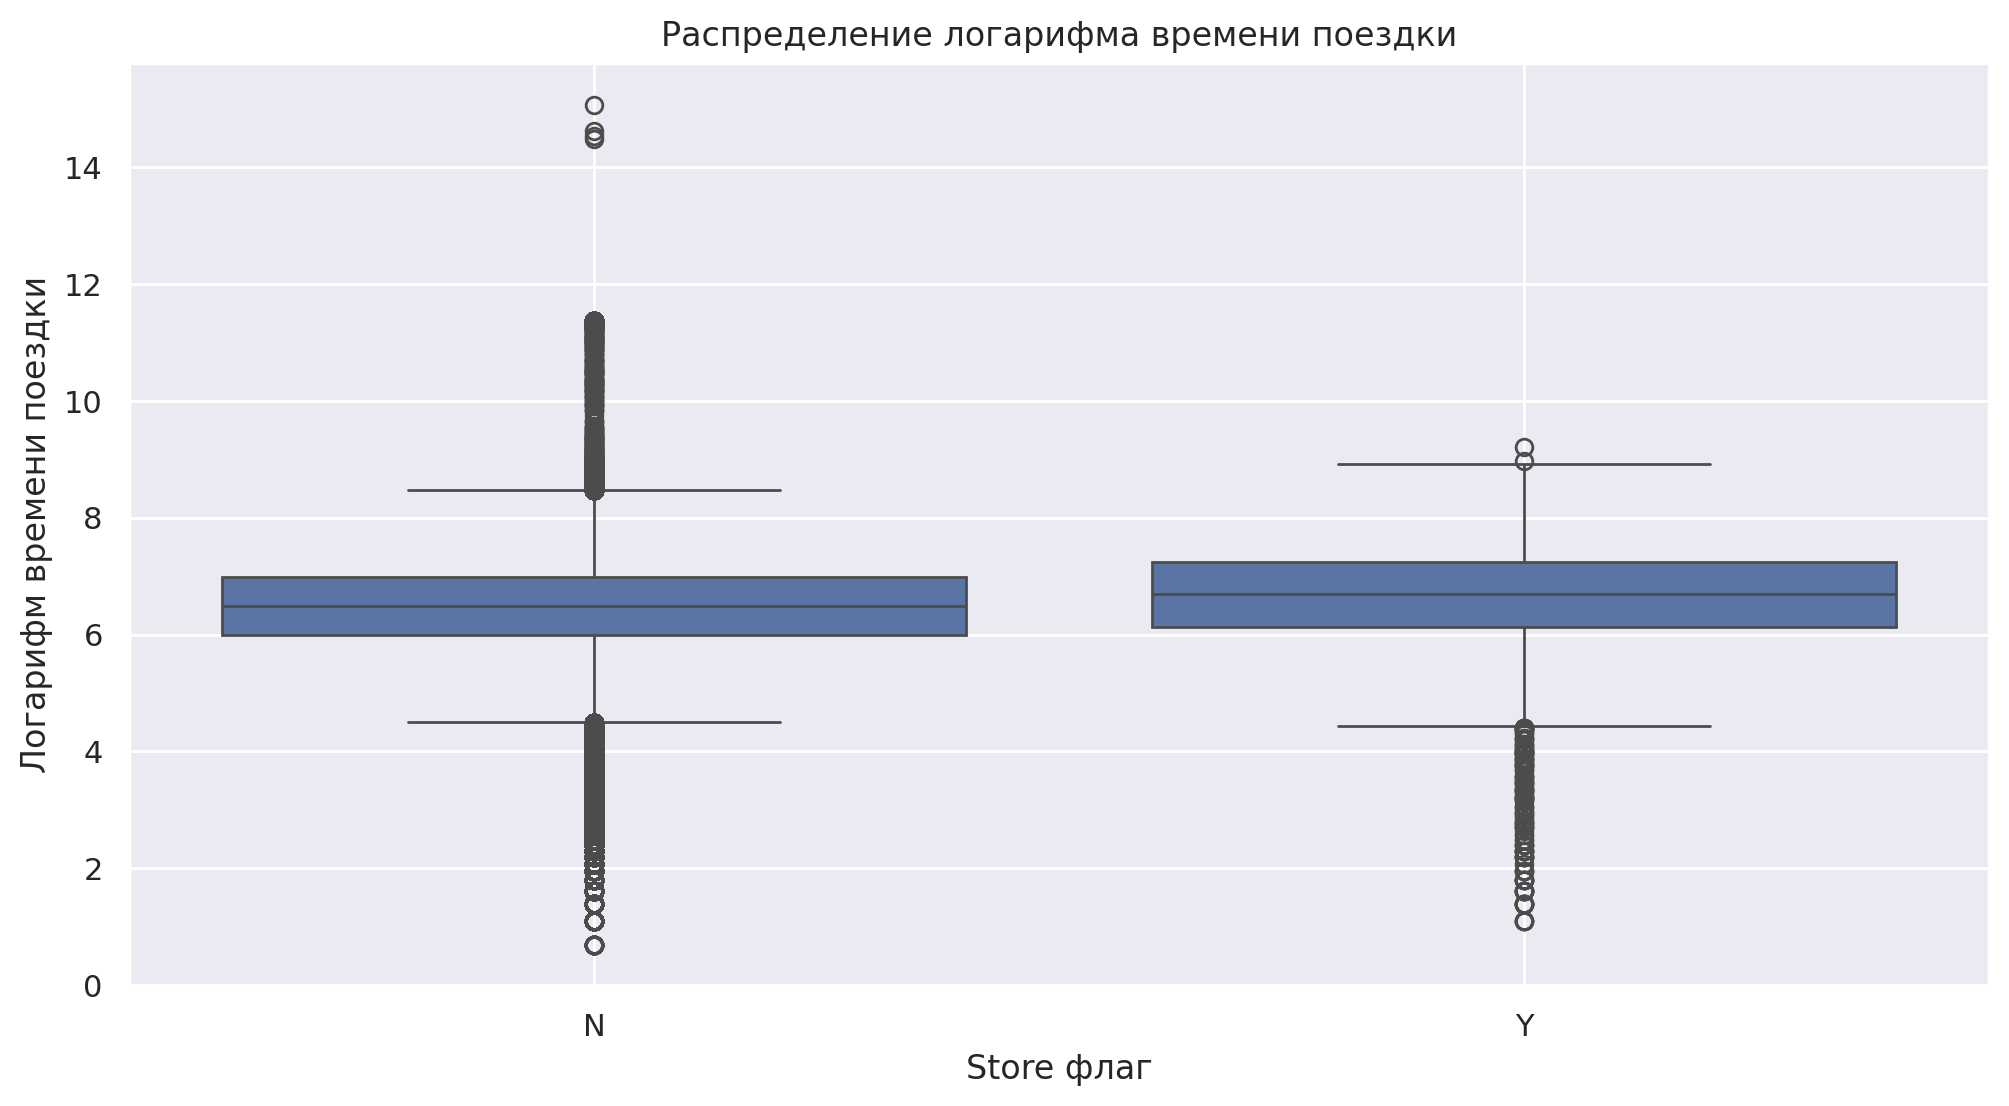

In [60]:
sns.boxplot(df, x='store_and_fwd_flag', y='log_trip_duration')
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Store флаг')
plt.ylabel('Логарифм времени поездки')
plt.grid(True)

plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [61]:
df['vendor_id'] = np.where(df['vendor_id'] == 1, 0, 1)

In [62]:
df['store_and_fwd_flag'] = np.where(df['store_and_fwd_flag'] == 'N', 0, 1)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Кажется сильными они не будут, т.к. медианное время поездки у них почти одинаковое, лишь в количестве пассажиров при некоторых значениях они значительно отличаются, но таких значений очень мало.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler



categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.4724


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Кажется признаки не дали ощутимого результата как и предполагалось.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [64]:
df.shape

(1458644, 25)

In [65]:
for feature in ['passenger_count', 'log_haversine', 'log_trip_duration']:
    lower_bound = np.percentile(df[feature], 1)
    upper_bound = np.percentile(df[feature], 99)
    df = df[(df[feature] >= lower_bound) & (df[feature] < upper_bound)]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

Я решил объединить дни в году, а то как-то много их.

In [66]:
df['day_of_year'] = df['day_of_year'] // 20

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.3, random_state=42)

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.3801


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [69]:
df.shape

(1354764, 25)

In [70]:
pd.get_dummies(df, columns=categorical).shape

(1354764, 271)

Возросло более чем в 10 раз.

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.6746


Кажется Ridge будет получше

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [72]:
from sklearn.model_selection import GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(df[numeric_features], df['log_trip_duration'], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

alphas = np.logspace(-2, 3, 20)
ridge_params = [{'alpha': alphas}]
lasso_params = [{'alpha': alphas}]
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring=rmsle, cv=10)
ridge_grid.fit(X_train_scaled, y_train)

lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring=rmsle, cv=10)
lasso_grid.fit(X_train_scaled, y_train)

best_alpha_ridge = ridge_grid.best_params_['alpha']
best_alpha_lasso = lasso_grid.best_params_['alpha']

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [73]:
zero_weights_count = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    zero_weights = np.sum(lasso_model.coef_ == 0)
    zero_weights_count.append(zero_weights)

In [74]:
zero_weights_count

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

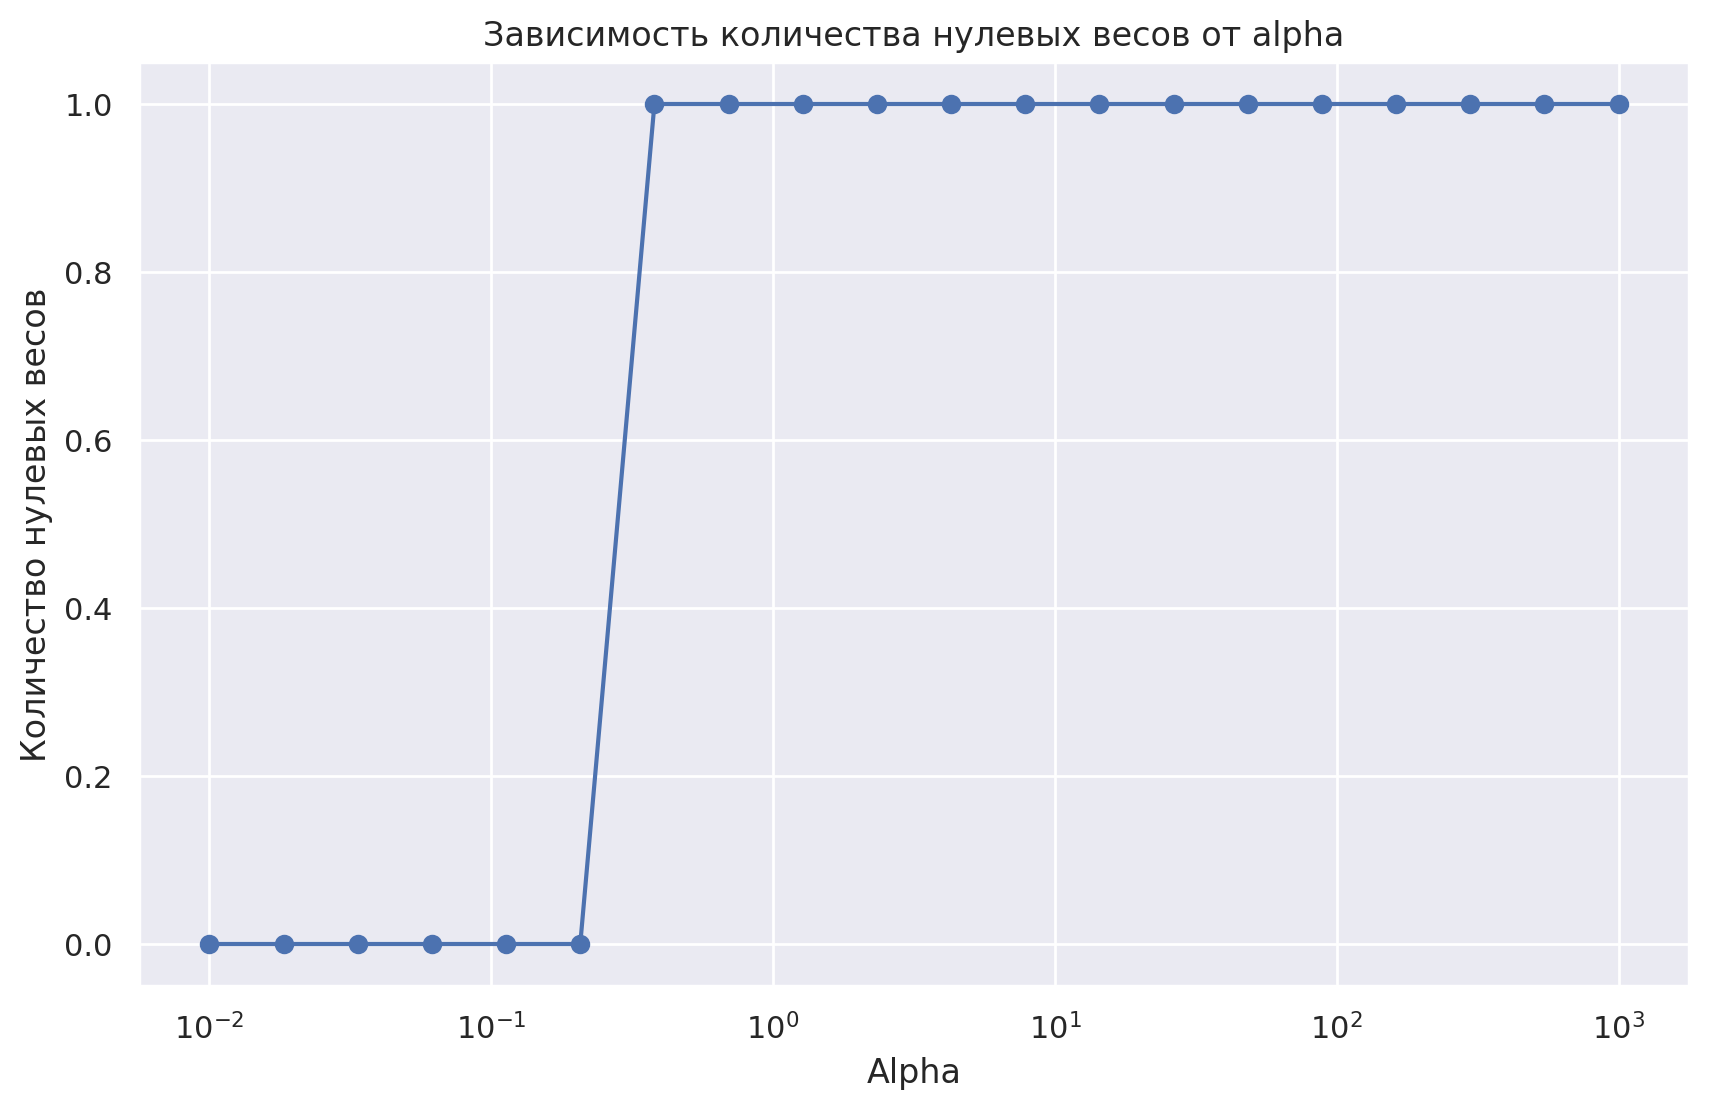

In [75]:
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, zero_weights_count, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Количество нулевых весов')
plt.title('Зависимость количества нулевых весов от alpha')
plt.grid(True)
plt.show()


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Это может быть полезным т.к. добавления новых признаков может помочь модели учесть сложные и нелинейные зависимости между начальной и конечной ячейками. А линейная модель хорошо работает с линейными признаками.

In [76]:
from collections import defaultdict

trip_to_count = defaultdict(int)

def count_trip(row):
    trip = (row['pickup_cell'], row['dropoff_cell'])
    trip_to_count[trip] += 1
    
_ = df.apply(count_trip, axis=1)

In [77]:
first_hund = sorted(trip_to_count, key=lambda x: -trip_to_count[x])[:100]

def get_trip_count(row):
    trip = (row['pickup_cell'], row['dropoff_cell'])
    return trip_to_count[trip] if trip in first_hund else -1

df['in_often_trip'] = df.apply(get_trip_count, axis=1)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.2, random_state=42)


categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'in_often_trip']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.3684


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [126]:
import folium
import numpy as np

red_first = np.array((40.74, -74.0))
red_second = np.array((40.81, -73.952))

green_first = np.array((40.777, -74))
green_second = np.array((40.76, -73.96))

m = folium.Map(location=[40.77, -73.976], zoom_start=12)

red_line = folium.PolyLine([red_first, red_second], color='red', weight=2.5, opacity=1)
green_line = folium.PolyLine([green_first, green_second], color='green', weight=2.5, opacity=1)

red_line.add_to(m)
green_line.add_to(m)

m

![download.jpeg](lines.png)

Найдём точку пересечения прямых

In [131]:
a1 = (red_second[1] - red_first[1]) / (red_second[0] - red_first[0])
b1 = red_first[1] - a1 * red_first[0]

a2 = (green_second[1] - green_first[1]) / (green_second[0] - green_first[0])
b2 = green_first[1] - a2 * green_first[0]

x_intersect = (b2 - b1) / (a1 - a2)
y_intersect = a1 * x_intersect + b1

intersect_point = np.array([x_intersect, y_intersect])

print("Точка пересечения двух линий:")
print(*intersect_point)

Точка пересечения двух линий:
40.76865044247787 -73.98035398230088


Спроецируем точки и вычислим новое расстояние

In [132]:
intersect_point = np.array((intersect_point[0], intersect_point[1]))
def proection_lat(lat):
    return intersect_point[0] - lat

def proection_long(long):
    return intersect_point[1] - long

df['manhattan_distance'] = (abs(proection_lat(df['dropoff_latitude']) - proection_lat(df['pickup_latitude'])) +
                            abs(proection_long(df['dropoff_longitude']) - proection_long(df['pickup_longitude'])))

In [133]:
df['log_manhattan_distance'] = np.log1p(df['manhattan_distance'])

In [135]:
correlation_manhattan = df['manhattan_distance'].corr(df['log_trip_duration'])
correlation_log_manhattan = df['log_manhattan_distance'].corr(df['log_trip_duration'])

print(f"Корреляция Манхэттенского расстояния: {correlation_manhattan}")
print(f"Корреляция логарифма Манхэттенского расстояния: {correlation_log_manhattan}")

Корреляция Манхэттенского расстояния: 0.6332449408410575
Корреляция логарифма Манхэттенского расстояния: 0.6476330502914102


Корреляция логарифма больше!

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [137]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.2, random_state=42)


categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'in_often_trip']
numeric_features = ['log_haversine', 'log_manhattan_distance']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.3640


Стало лучше

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [143]:
!pip install -U --pre h3

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.8/931.8 KB 1.3 MB/s eta 0:00:001.3 MB/s eta 0:00:01
  Attempting uninstall: h3
    Found existing installation: h3 3.7.6
    Uninstalling h3-3.7.6:
      Successfully uninstalled h3-3.7.6


In [146]:
import h3

resolution = 8

def lat_lng_to_h3(lat, lng, resolution):
    return h3.geo_to_h3(lat, lng, resolution)

df['start_h3'] = df.apply(lambda row: lat_lng_to_h3(row['pickup_latitude'], row['pickup_longitude'], resolution), axis=1)
df['end_h3'] = df.apply(lambda row: lat_lng_to_h3(row['dropoff_latitude'], row['dropoff_longitude'], resolution), axis=1)

Попробуем просто добавить конечный и начальный шестиугольник

In [154]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.2, random_state=42)


categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'in_often_trip', 'start_h3', 'end_h3']
numeric_features = ['log_haversine', 'log_manhattan_distance']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.3570


Значительно лучше

Признак количество шестиугольников между начальным и конечным шестиугольником

In [148]:
df['h3_distance'] = df.apply(lambda row: h3.h3_distance(row['start_h3'], row['end_h3']), axis=1)

In [156]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.2, random_state=42)


categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'in_often_trip', 'start_h3', 'end_h3', 'h3_distance']
numeric_features = ['log_haversine', 'log_manhattan_distance']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.3554


Ещё лучше!

In [167]:
h3_to_num = defaultdict(int)

def count_trip_in_h3(row):
    h3_to_num[row['start_h3']] += 1


df.apply(lambda row: count_trip_in_h3(row), axis=1)
df['num_trips_in_neighbors'] = df.apply(lambda row: sum([h3_to_num[neig] for neig in h3.k_ring(row['start_h3'], 1)]), axis=1)

In [171]:
h3_to_num = defaultdict(int)

def count_mean_trip_dur_in_h3(h):
    h3_to_num[h] = df[df['start_h3'].isin(h3.k_ring(h, 1))]['log_trip_duration'].mean()

for h in set(df['start_h3']):
    count_mean_trip_dur_in_h3(h)
    
df['mean_trip_duration_in_neighbors'] = df.apply(lambda row: h3_to_num[row['start_h3']], axis=1)

In [173]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.2, random_state=42)


categorical = ['day_of_week', 'month', 'hour', 'is_anomaly', 'day_of_year', 'pickup_cell', 'dropoff_cell', 'traffic-jams', 'start_in_john_airp', 'end_in_john_airp', 'start_in_la_gv_airp', 'end_in_la_gv_airp', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'in_often_trip', 'start_h3', 'end_h3', 'h3_distance']
numeric_features = ['log_haversine', 'log_manhattan_distance', 'mean_trip_duration_in_neighbors', 'num_trips_in_neighbors']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)

])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))

Test RMSLE = 0.3554


Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

![download.jpeg](download.jpeg)